In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

%matplotlib inline

from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.interpolation import shift


#data reading, including calibration, this is the only routine file needed to run this routine
from atten_data2 import *


nchannels=7 # number of accelerometers
# figures in submitted paper!



ms
tpeak 0.2352
ms
tpeak 0.2356
ms
tpeak 0.2391
ms
tpeak 0.2336
ms
tpeak 0.2354
ms
tpeak 0.2364
ms
tpeak 0.1997
ms
tpeak 0.1982


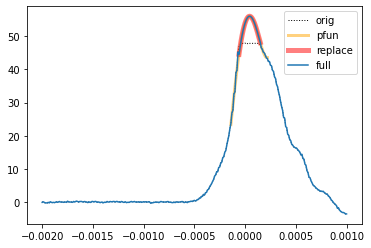

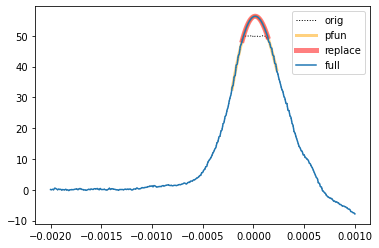

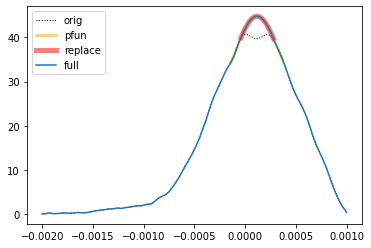

In [2]:
fileroot22 = 'max_data/11.27.21/'   # this is where the data is!
oroot = 'nov27'  # for making figures

tmin=0.1; tmax=0.6;  # search for peak in this window in ms
tleft =-0.2; tright = 1.2;   # chop data to this window after zeroing peak
swin = 11  # savgol filter by this window in samples

csvfile_root_R5  = fileroot22+'millet_R5_'   # names of data files
csvfile_root_R10 = fileroot22+'millet_R10_'
csvfile_root_R15 = fileroot22+'millet_R15_'
csvfile_root_L5  = fileroot22+'millet_L5_'
csvfile_root_L10 = fileroot22+'millet_L10_'
csvfile_root_L15 = fileroot22+'millet_L15_'
csvfile_root_SL5 = fileroot22+'sand_L5_'
csvfile_root_SL5_2 = fileroot22+'sand_L5_2'

ds_R5 = read_data_xy_struct(csvfile_root_R5,tmin,tmax,tleft,tright,swin)
ds_R10 = read_data_xy_struct(csvfile_root_R10,tmin,tmax,tleft,tright,swin)
ds_R15 = read_data_xy_struct(csvfile_root_R15,tmin,0.5,tleft,tright,swin)
ds_L5 = read_data_xy_struct(csvfile_root_L5,tmin,tmax,tleft,tright,swin)
ds_L10 = read_data_xy_struct(csvfile_root_L10,tmin,tmax,tleft,tright,swin)
ds_L15 = read_data_xy_struct(csvfile_root_L15,tmin,tmax,tleft,tright,swin)
ds_SL5 = read_data_xy_struct(csvfile_root_SL5,tmin,tmax,tleft,tright,1)
ds_SL5_2 = read_data_xy_struct(csvfile_root_SL5_2,tmin,tmax,tleft,tright,1)

# fix some saturated peaks
ddi=8; frac=0.97; fix_chop(ds_SL5,-0.002,0.001,0,1,ddi,frac) 
ddi=10; frac=0.97; fix_chop(ds_SL5_2,-0.002,0.001,0,1,ddi,frac) 
ddi=10; frac=0.97; fix_chop(ds_L5,-0.002,0.001,0,1,ddi,frac) 

In [3]:
cor_acc(ds_R10)  # how far off can we be!
# we conclude there is no point in correcting the y axis data (vertical z)
# there might be a point to correcting the x (R radial) axis data

y angle -1.0 deg
y angle -0.9 deg
y angle -0.4 deg
y angle -0.4 deg
y angle -0.9 deg
y angle -0.1 deg
y angle -0.8 deg
x angle -0.7 deg
x angle 7.5 deg
x angle 2.5 deg
x angle 0.5 deg
x angle 4.7 deg
x angle 4.0 deg
x angle 4.4 deg


198.20 ms
196.60 ms


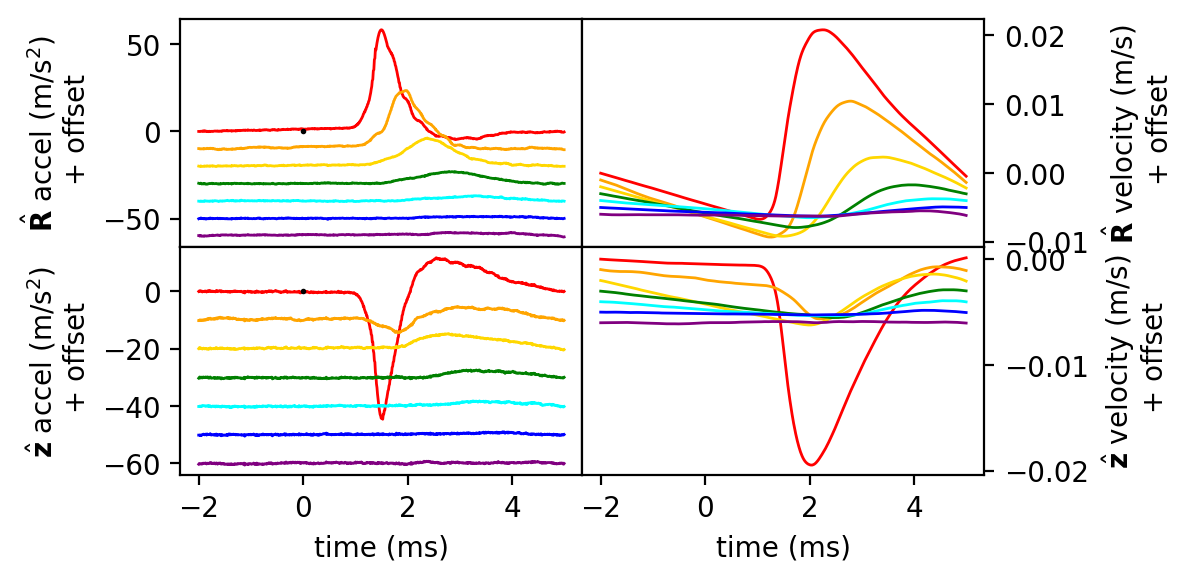

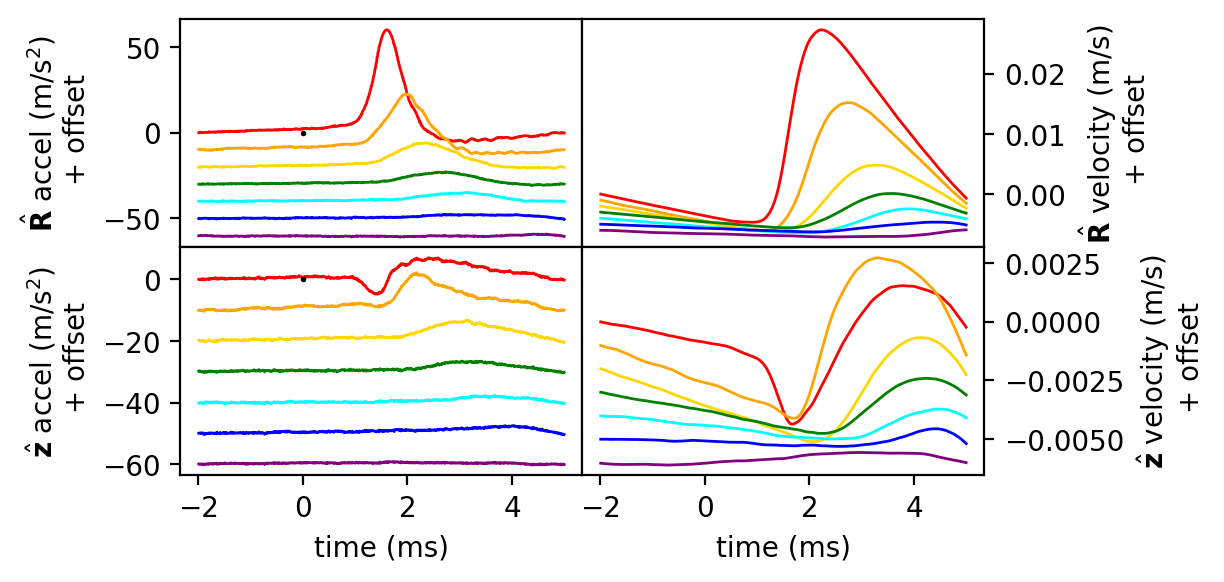

In [4]:
# check time of SL5, SL5_2

#Here are my decissions on where to shift time
schoice = (198.8-0.6)*1e-3
shift_time_tpeak(ds_SL5  , schoice)
schoice = (197.3-0.7)*1e-3
shift_time_tpeak(ds_SL5_2, schoice)

dy_vec = np.array([10,10,0.001,0.001]); clabel = ''; ofile=''
fig,axarr=plt_av_fig_ds(ds_SL5,dy_vec,\
            -0.002,0.005,ofile,0,0,clabel,10,0,'SL5')
ts = 0.0
axarr[0][0].plot([-ts],[0],'ko',ms=1)
axarr[1][0].plot([-ts],[0],'ko',ms=1)


fig,axarr=plt_av_fig_ds(ds_SL5_2,dy_vec,\
            -0.002,0.005,ofile,0,0,clabel,10,0,'LS5_2')
ts = 0.0
axarr[0][0].plot([-ts],[0],'ko',ms=1)
axarr[1][0].plot([-ts],[0],'ko',ms=1)
#print('{:.2f} ms'.format(ds_SL5_2.tpeak*1e3-ts))

#shift_time(ds_SL5  ,1.5*1e-3)
#shift_time(ds_SL5_2,1.5*1e-3)



231.40 ms


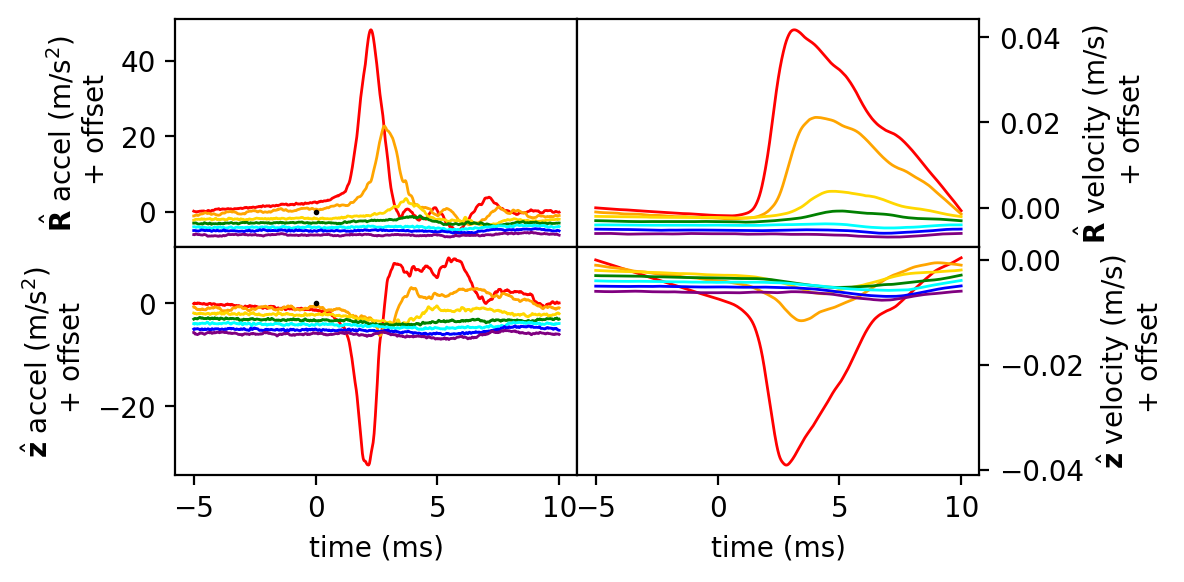

In [5]:
# check zero time for ML5

shift_time_tpeak(ds_L5  , 231.4*1e-3)
dy_vec = np.array([1,1,0.001,0.001]); clabel = ''; ofile=''
fig,axarr=plt_av_fig_ds(ds_L5,dy_vec,\
            -0.005,0.01,ofile,0,0,clabel,0,0,'')
ts=0
axarr[0][0].plot([-ts],[0],'ko',ms=1)
axarr[1][0].plot([-ts],[0],'ko',ms=1)


232.80 ms


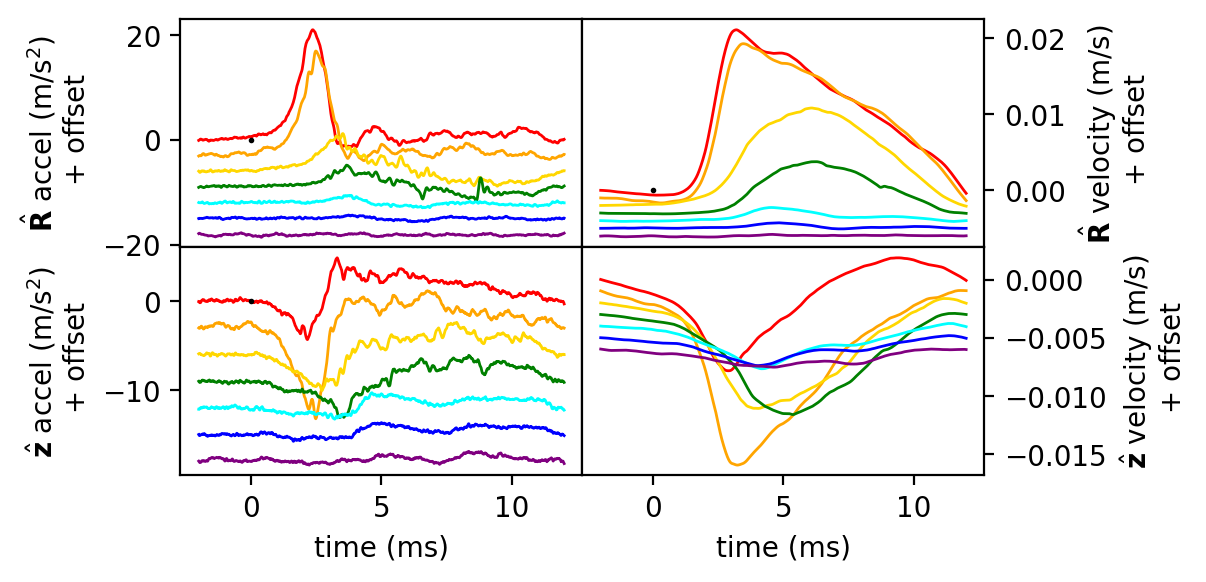

In [6]:
# check zero time for MR5
shift_time_tpeak(ds_R5  , 232.8*1e-3)  # decision 233
dy_vec = np.array([3,3,0.001,0.001]); clabel = ''; ofile=''
fig,axarr=plt_av_fig_ds(ds_R5,dy_vec,\
            -0.002,0.012,ofile,0,0,clabel,0,0,'')
ts = 0
axarr[0][0].plot([-ts],[0],'ko',ms=1)
axarr[1][0].plot([-ts],[0],'ko',ms=1)
axarr[0][1].plot([-ts],[0],'ko',ms=1)

#print('{:.2f} ms'.format(ds_R5.tpeak*1e3-ts))


In [7]:
# correct all the rest millets

shift_time_tpeak(ds_L10, 232.5*1e-3)
shift_time_tpeak(ds_R10, 232.5*1e-3)
shift_time_tpeak(ds_L15, 232.5*1e-3)
shift_time_tpeak(ds_R15, 232.5*1e-3)

232.50 ms
232.50 ms
232.50 ms
232.50 ms


(<Figure size 1200x600 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7ec847580>,
       dtype=object))

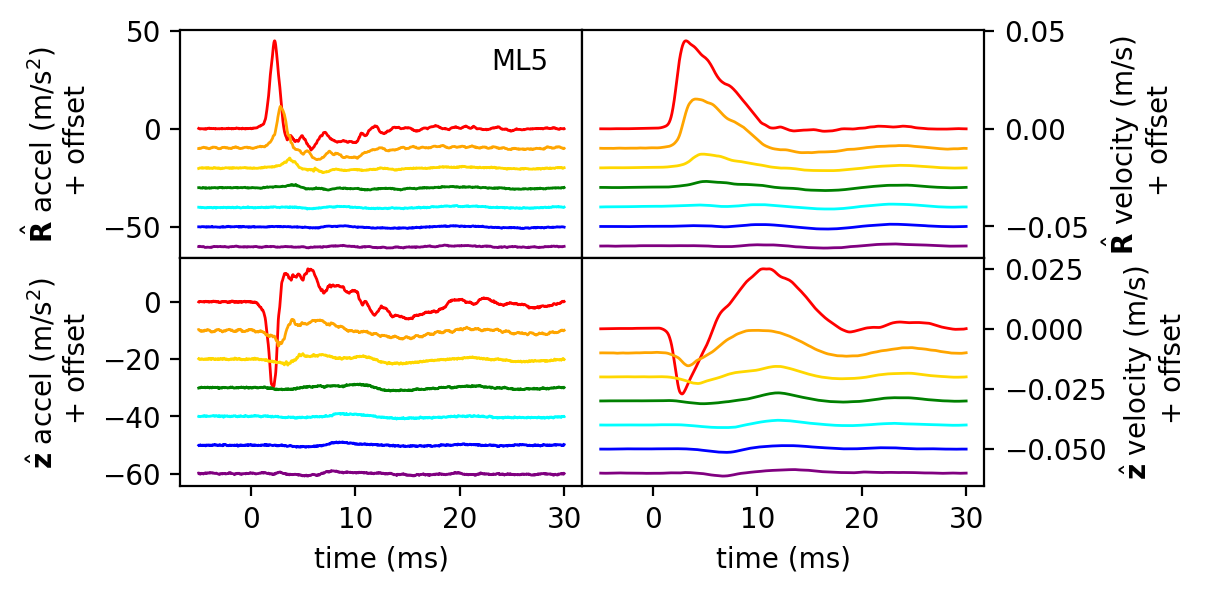

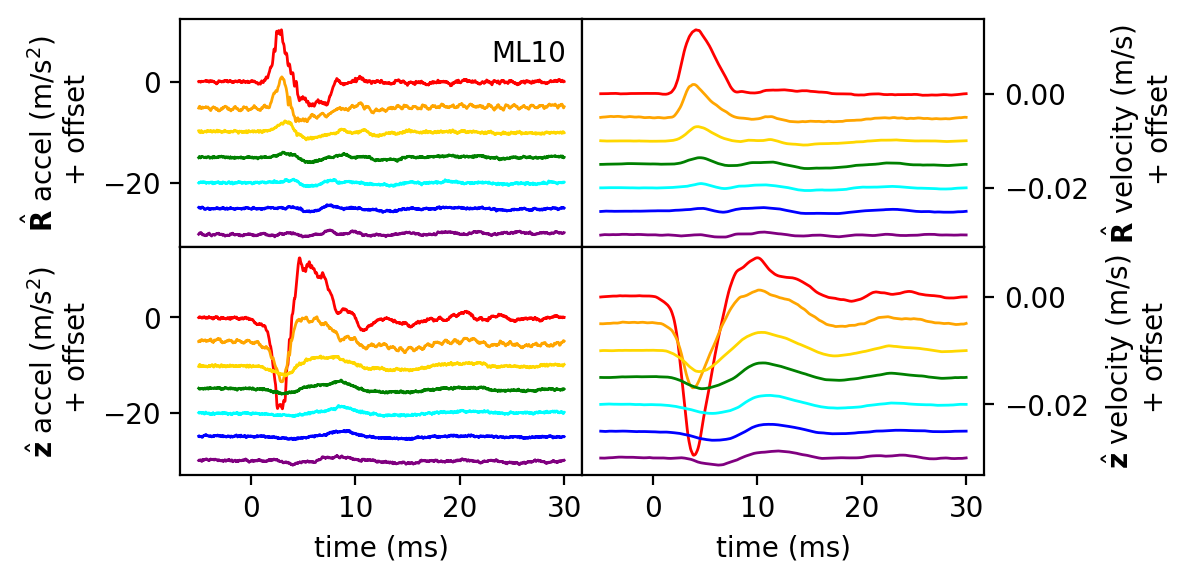

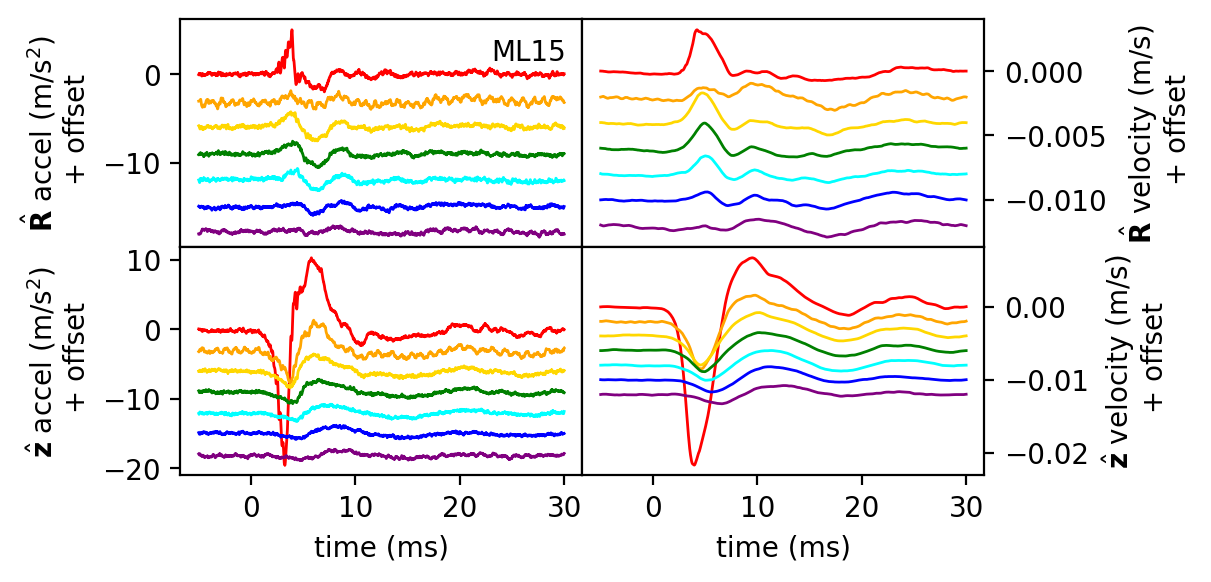

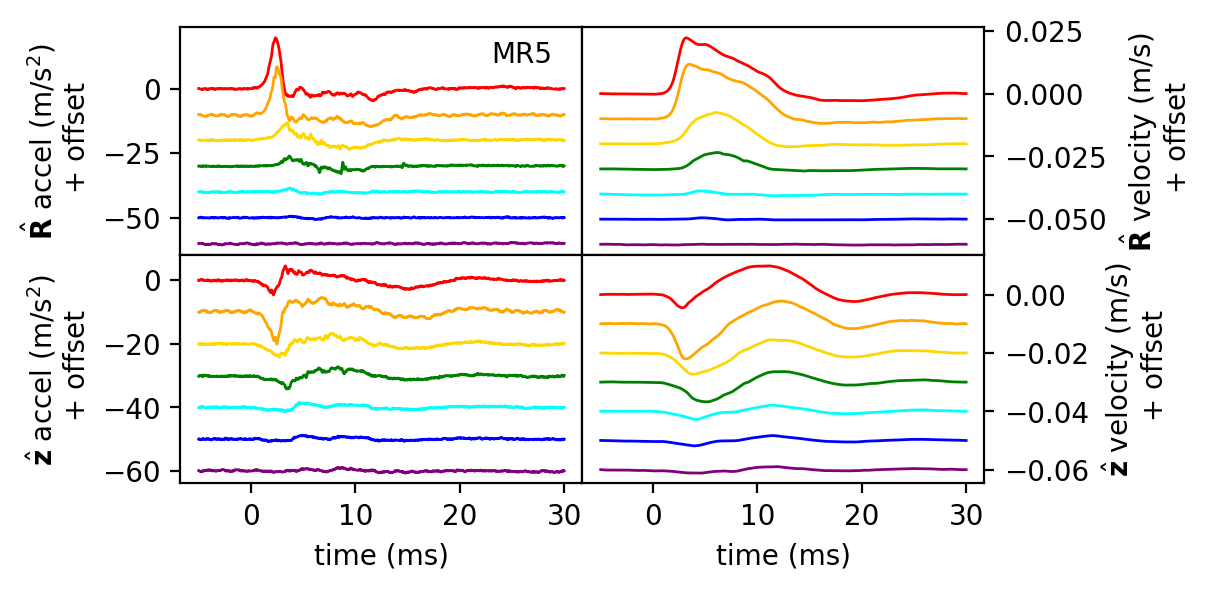

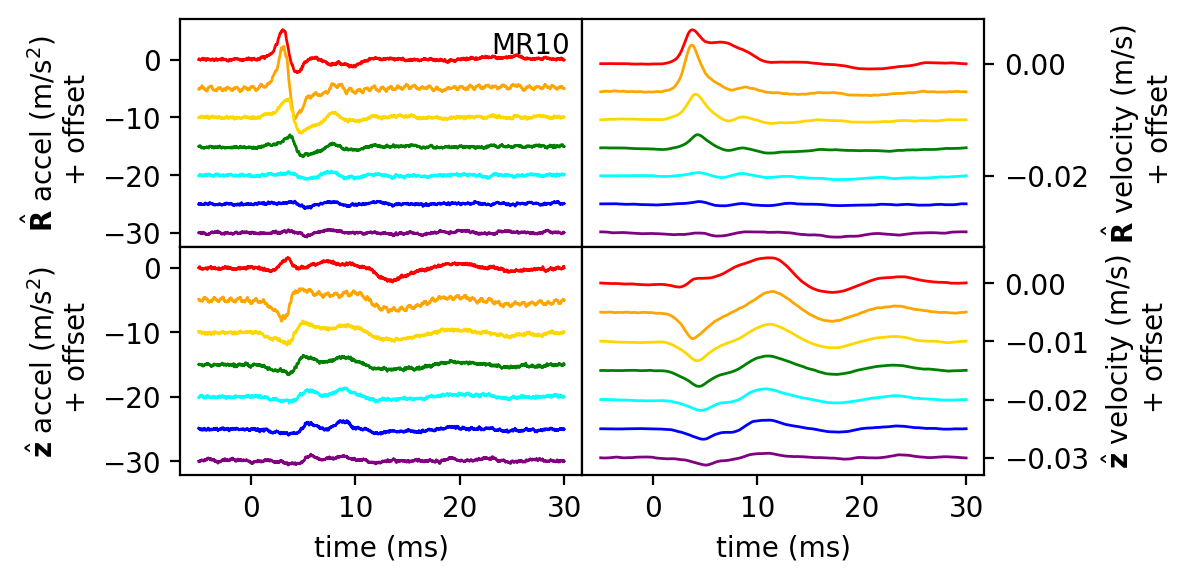

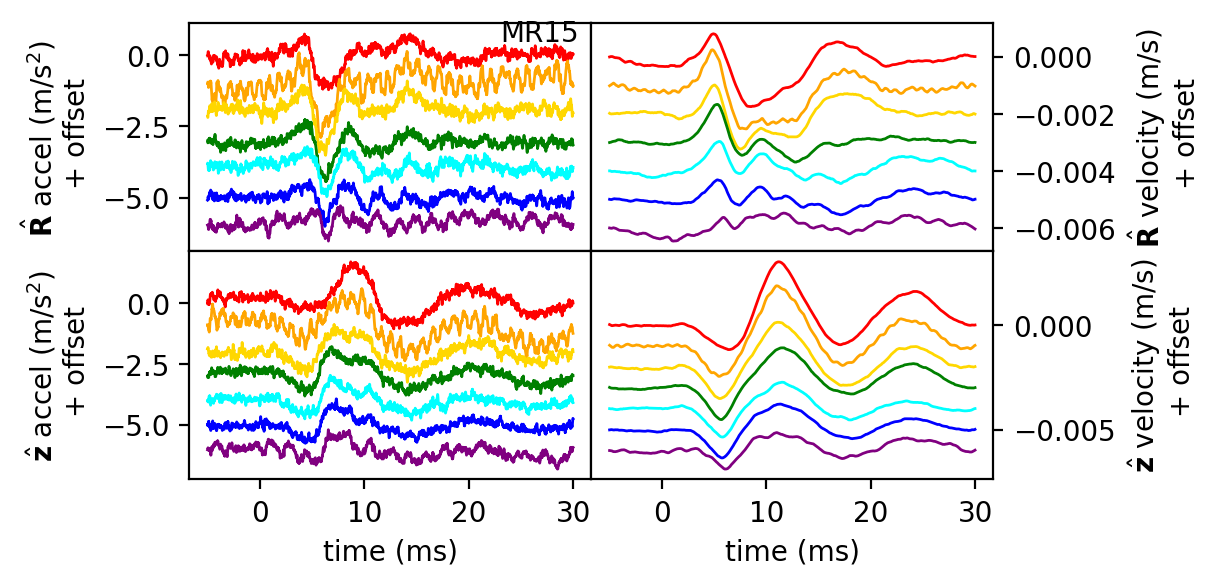

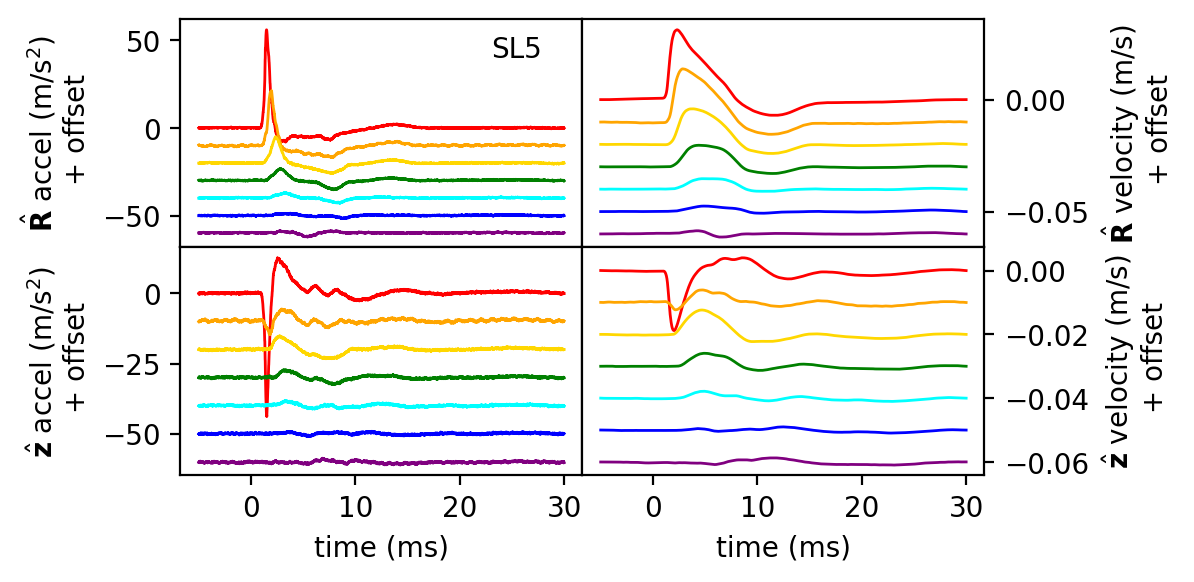

In [8]:
# make a bunch of figures of accel data
tleft = -0.005; tright= 0.03;  Rlab=23.  

dy_vec = np.array([10,10,0.01,0.01]); clabel = 'ML5'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_L5,dy_vec,tleft,tright,ofile,Rlab,30,clabel,-20,50,'')

dy_vec = np.array([5,5,0.005,0.005]); clabel = 'ML10'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_L10,dy_vec,tleft,tright,ofile,Rlab,4,clabel,0,0,'')

dy_vec = np.array([3,3,0.002,0.002]); clabel = 'ML15'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_L15,dy_vec,tleft,tright,ofile,Rlab,1.5,clabel,0,0,'')

dy_vec = np.array([10,10,0.01,0.01]); clabel = 'MR5'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_R5,dy_vec,tleft,tright,ofile,Rlab,10,clabel,0,0,'')

dy_vec = np.array([5,5,0.005,0.005]); clabel = 'MR10'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_R10,dy_vec,tleft,tright,ofile,Rlab,1,clabel,0,0,'')

dy_vec = np.array([1,1,0.001,0.001]); clabel = 'MR15'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_R15,dy_vec,tleft,tright,ofile,Rlab,0.5,clabel,0,0,'')

dy_vec = np.array([10,10,0.01,0.01]); clabel = 'SL5'; ofile=oroot+clabel+'.png'
plt_av_fig_ds(ds_SL5,dy_vec,tleft,tright,ofile,Rlab,40,clabel,-20,55,'')

#dy_vec = np.array([10,10,0.01,0.01]); clabel = 'SL5'; ofile=oroot+clabel+'.png'
#plt_av_fig_ds(ds_SL5_2,dy_vec,tleft,tright,ofile,Rlab,30,clabel,0,0,'')

In [9]:
# set up the coordinate templates
Rcoords_R5 = np.zeros(nchannels) + 0.055
zcoords_R5 = -(np.arange(nchannels)*3. + 4.0)/100
print('z=',zcoords_R5)
print('R=',Rcoords_R5)
ds_R5.set_coords(Rcoords_R5,zcoords_R5)

Rcoords_R10 = np.zeros(nchannels) + 0.105
zcoords_R10 = -(np.arange(nchannels)*3. + 4.0)/100
print('z=',zcoords_R10)
print('R=',Rcoords_R10)
ds_R10.set_coords(Rcoords_R10,zcoords_R10)

Rcoords_R15 = np.zeros(nchannels) + 0.155
zcoords_R15 = -(np.arange(nchannels)*3. + 4.0)/100
print('z=',zcoords_R15)
print('R=',Rcoords_R15)
ds_R15.set_coords(Rcoords_R15,zcoords_R15)

Rcoords_L5 =  (np.arange(nchannels)*3. + 5.0)/100
#Rcoords_L5[0] += 0.5/100  # do you want this or not?
zcoords_L5 =  np.zeros(nchannels)  - 0.05
print('z=',zcoords_L5)
print('R=',Rcoords_L5)
ds_L5.set_coords(Rcoords_L5,zcoords_L5)
ds_SL5.set_coords(Rcoords_L5,zcoords_L5)
ds_SL5_2.set_coords(Rcoords_L5,zcoords_L5)

Rcoords_L10 =  (np.arange(nchannels)*3. + 2.0)/100
zcoords_L10 =   np.zeros(nchannels)  - 0.10
print('z=',zcoords_L10)
print('R=',Rcoords_L10)
ds_L10.set_coords(Rcoords_L10,zcoords_L10)

Rcoords_L15 =  (np.arange(nchannels)*3. + 2.0)/100
zcoords_L15 =   np.zeros(nchannels)  - 0.15
print('z=',zcoords_L15)
print('R=',Rcoords_L15)
ds_L15.set_coords(Rcoords_L15,zcoords_L15)



z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.055 0.055 0.055 0.055 0.055 0.055 0.055]
z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.105 0.105 0.105 0.105 0.105 0.105 0.105]
z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.155 0.155 0.155 0.155 0.155 0.155 0.155]
z= [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
R= [0.05 0.08 0.11 0.14 0.17 0.2  0.23]
z= [-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
R= [0.02 0.05 0.08 0.11 0.14 0.17 0.2 ]
z= [-0.15 -0.15 -0.15 -0.15 -0.15 -0.15 -0.15]
R= [0.02 0.05 0.08 0.11 0.14 0.17 0.2 ]


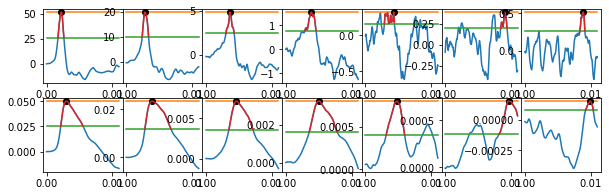

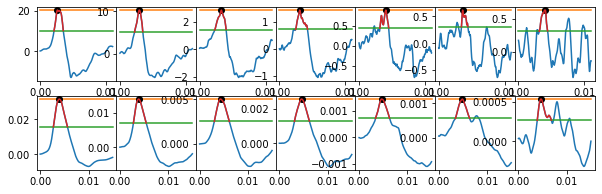

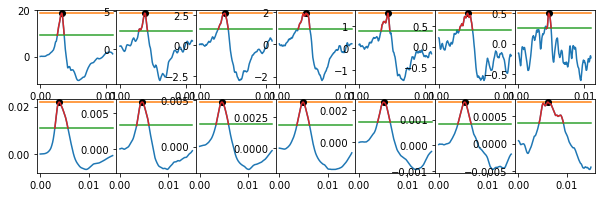

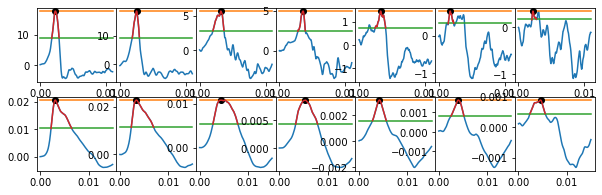

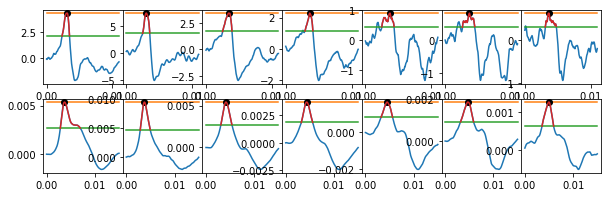

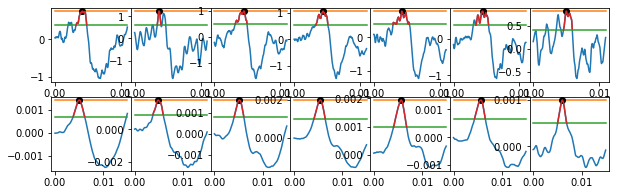

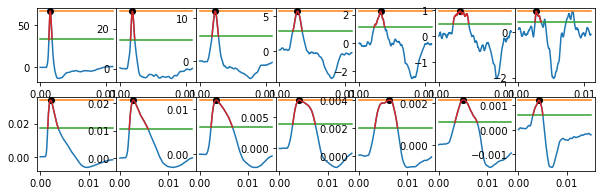

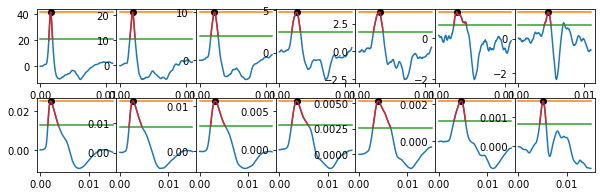

In [10]:
# compute some peak stuff
tleft=-0.000; tright_a=0.011; tright_v = 0.011; swin=51
#print('ML5')
ms_L5=find_peaks_rcombo(ds_L5,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('ML10')
ms_L10=find_peaks_rcombo(ds_L10,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('ML15')
ms_L15=find_peaks_rcombo(ds_L15,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('MR5')
ms_R5=find_peaks_rcombo(ds_R5,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('MR10')
ms_R10=find_peaks_rcombo(ds_R10,tleft,tright_a,tright_v,swin)
#print('MR15')
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
ms_R15=find_peaks_rcombo(ds_R15,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('SL5')
ms_SL5=find_peaks_rcombo(ds_SL5,tleft,tright_a,tright_v,swin)
tleft=0.000; tright_a=0.011; tright_v = 0.015; swin =51
#print('SL5_2')
ms_SL5_2=find_peaks_rcombo(ds_SL5_2,tleft,tright_a,tright_v,swin)

In [11]:
print(ms_R5.a_fwhm)
ms_R5.a_fwhm[3]=1.3e-3

[0.00112 0.00109 0.00167 0.00114 0.0016  0.00084 0.00068]


In [12]:
# make exponents  (used only in v \propto P^1/6 line)

def mkexps(beta_D,alpha_P):
    denom = 2.0 + beta_D - 2*alpha_P
    gamma_vP = -5*alpha_P/denom
    gamma_Ppk = -5.0/denom
    gamma_tprop = (2.0 +  beta_D + 3*alpha_P)/denom
    gamma_dtv  = 0.5 - 2.5*(beta_D - 2*alpha_P)/denom
    gamma_Wv = 0.5 + (-2.0 - 3.5*beta_D + 2*alpha_P)/denom
    gamma_vpk = -5.0*(1 - alpha_P)/denom
    gamma_apk = (-5.0 + 2.5*beta_D)/denom - 0.5
    gamma_EJ =  (-10.0 + 10*alpha_P - 5.2*beta_D)/denom + 2.5
    gamma_delta = (-4.0  -2*beta_D + alpha_P)/denom
    print('{:.2f} {:.2f} {:.2f}  {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(\
            gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta))
    return gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta  

g_lab0 = r'$\beta_D=0$,$\alpha_P$=0'
print('g_vP  g_Ppk g_tprp g_dt g_Wv g_vpk g_apk g_EJ g_delta')
gamma_vP0,gamma_Ppk0,gamma_tprop0,gamma_dtv0,gamma_Wv0,gamma_vpk0,gamma_apk0,gamma_EJ0,gamma_delta0 = mkexps(0,0)
beta_D = 0.0;  alpha_P = 1.0/6.0; g_lab1 = r'$\beta_D=0$,$\alpha_P$=$\frac{1}{6}$'
gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta = mkexps(beta_D,alpha_P)

beta_D = 0.5;  alpha_P = 1.0/6.0; g_lab2 = r'$\beta_D$=$\frac{1}{2}$,$\alpha_P$=$\frac{1}{6}$'
gamma_vP2,gamma_Ppk2,gamma_tprop2,gamma_dtv2,gamma_Wv2,gamma_vpk2,gamma_apk2,gamma_EJ2,gamma_delta2 = mkexps(beta_D,alpha_P)

print('-----------------------------------------')
print('vP   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_vP0   ,gamma_vP   ,gamma_vP2))
print('Ppk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_Ppk0  ,gamma_Ppk  ,gamma_Ppk2))
print('tpro {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_tprop0,gamma_tprop,gamma_tprop2))
print('dt   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_dtv0  ,gamma_dtv  ,gamma_dtv2))
print('W    {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_Wv0   ,gamma_Wv   ,gamma_Wv2))
print('vpk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_vpk0  ,gamma_vpk  ,gamma_vpk2))
print('apk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_apk0  ,gamma_apk  ,gamma_apk2))
print('dpk   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_delta0   ,gamma_delta   ,gamma_delta2))
print('EJ   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_EJ0   ,gamma_EJ   ,gamma_EJ2))

g_vP  g_Ppk g_tprp g_dt g_Wv g_vpk g_apk g_EJ g_delta
0.00 -2.50 1.00  0.50 -0.50 -2.50 -3.00 -2.50 -2.00
-0.50 -3.00 1.50  1.00 -0.50 -2.50 -3.50 -2.50 -2.30
-0.38 -2.31 1.38  0.31 -1.08 -1.92 -2.23 -2.55 -2.23
-----------------------------------------
vP    0.00 & -0.50 & -0.38
Ppk  -2.50 & -3.00 & -2.31
tpro  1.00 &  1.50 &  1.38
dt    0.50 &  1.00 &  0.31
W    -0.50 & -0.50 & -1.08
vpk  -2.50 & -2.50 & -1.92
apk  -3.00 & -3.50 & -2.23
dpk   -2.00 & -2.30 & -2.23
EJ   -2.50 & -2.50 & -2.55


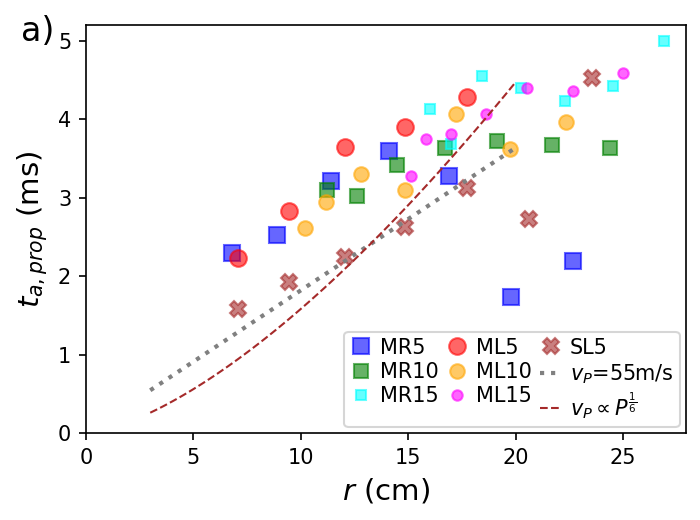

In [13]:
colorlist = ['blue','green','cyan','red','orange','magenta','brown','brown']
mlabellist = ['MR5','MR10','MR15','ML5','ML10','ML15','SL5','SL5']

fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.18, left=0.18,right=0.98)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,ms_R5.a_tprop*1e3 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,ms_R10.a_tprop*1e3,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,ms_R15.a_tprop*1e3,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L5.rcoords*1e2 ,ms_L5.a_tprop*1e3 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,ms_L10.a_tprop*1e3,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,ms_L15.a_tprop*1e3,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5.a_tprop*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5_2.a_tprop*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.set_ylabel(r'$t_{a,prop}$ (ms)',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0,top=5.2)
ax.set_xlim(left=0)

xvec = np.linspace(3,20,100)/100
v_p = 55.
tvec = xvec/v_p
vlab = r'$v_P$={:.0f}m/s'.format(v_p)

ax.plot(xvec*100,tvec*1e3,':',label=vlab,color='grey',lw=2)
#ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)

tvec1 = xvec**gamma_tprop  /20
#fac = tvec[0]/tvec1[0]
#tvec1 *= fac
#tvec2 = xvec**gamma_tprop2 /25
#ax.plot(xvec*100,tvec1*1e3,'--',label=g_lab1,color='brown',lw=1)
brown_label = r'$v_P \propto P^\frac{1}{6}$'
ax.plot(xvec*100,tvec1*1e3,'--',label=brown_label,color='brown',lw=1)
#ax.plot(xvec*100,tvec2*1e3,'-.',label=g_lab2,color='black',lw=1)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=3,columnspacing=0.4,loc='lower right')
ax.text(-3,5,'a)',fontsize=16)
plt.savefig(oroot+'tprop_a.png')

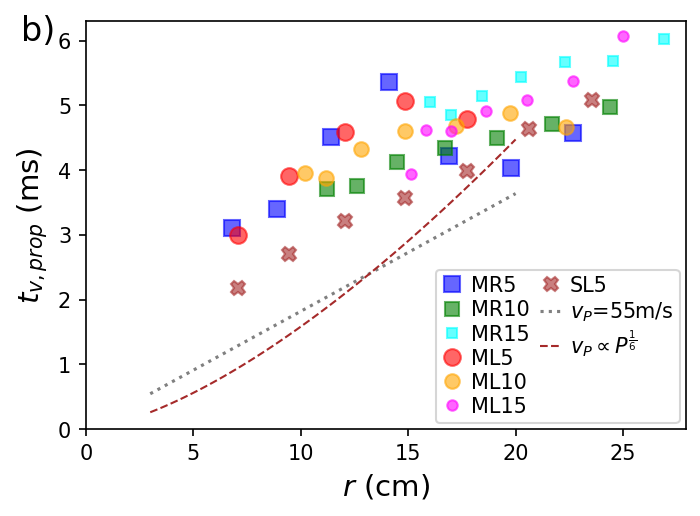

In [14]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.18, left=0.18,right=0.98)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,ms_R5.v_tprop*1e3 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,ms_R10.v_tprop*1e3,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,ms_R15.v_tprop*1e3,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L5.rcoords*1e2 ,ms_L5.v_tprop*1e3 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,ms_L10.v_tprop*1e3,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,ms_L15.v_tprop*1e3,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5.v_tprop*1e3,'X',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,ms_SL5_2.v_tprop*1e3,'X',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])

ax.set_ylabel(r'$t_{v,prop}$ (ms)',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0,top=6.3)
ax.set_xlim(left=0)

xvec = np.linspace(3,20,100)/100
v_p = 55.
tvec = (xvec/v_p)
vlab = r'$v_P$={:.0f}m/s'.format(v_p)

ax.plot(xvec*100,tvec*1e3,':',label=vlab,color='grey')

tvec1 = xvec**gamma_tprop /20
tvec2 = xvec**gamma_tprop2 /25
ax.plot(xvec*100,tvec1*1e3,'--',label=brown_label,color='brown',lw=1)
#ax.plot(xvec*100,tvec2*1e3,'-.',label=g_lab2,color='black',lw=1)
ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower right')
ax.text(-3,6,'b)',fontsize=16)
plt.savefig(oroot+'tprop_v.png')

In [15]:
# for millet!
print('for millet')
# print Froude no, pi_4, pi_R, K_impact, v_impact
# things to set:
rho_s = 0.746 *1e3 # g/cc to kg/m^3 millet
m_p = 27.3 *1e-3 # g to kg  Rainbow projectile with tape
R_p = 1.83 * 1e-2 # cm to m
R_crater = 11.0/2.0 *1e-2  # cm to m
hdrop = 101.0*1e-2  # cm to m
g = 9.8 # m/s^2 
# computed quantities
v_impact = np.sqrt(2*g*hdrop) # m/s
print('v_impact = {:.2f} m/s'.format(v_impact))
Fr = v_impact/np.sqrt(g*R_p)
print('Fr = {:.2f}'.format(Fr))
vol = 4.0*np.pi/3.0  *R_p**3
rho_p = m_p/vol  # kg/m3
print('rho_p = {:.3f} kg/m3'.format(rho_p))
pi_4 = rho_s/rho_p
print('pi_4 = {:.2f}'.format(pi_4))
pi_R = R_crater * (rho_s/m_p)**(1./3.)
print('pi_R = {:.2f}'.format(pi_R))
K_impact = 0.5*m_p*v_impact**2  # mks
print('K_impact= {:.2f} J'.format(K_impact))
E_g = 0.1e9 # grain elastic modulus  #kms

print('')
print('for sand')

# print Froude no, pi_4, pi_R, K_impact, v_impact
# things to set:
Srho_s = 1.5 *1e3 # g/cc to kg/m^3 millet
Sm_p = 30.9 *1e-3 # g to kg  Rainbow projectile with tape
SR_p = 1.41 * 1e-2 # cm to m
SR_crater = 7.5/2.0 *1e-2  # cm to m
Shdrop = 115.0*1e-2  # m
#g = 9.8 # m/s^2 
# computed quantities
Sv_impact = np.sqrt(2*g*Shdrop)  # m/s
print('v_impact = {:.2f} m/s'.format(Sv_impact))

# for sand
SFr = Sv_impact/np.sqrt(g*SR_p)
print('SFr = {:.2f}'.format(SFr))
Svol = 4.0*np.pi/3.0  *SR_p**3
Srho_p = Sm_p/Svol
print('Srho_p = {:.3f} kg/m3'.format(Srho_p))
Spi_4 = Srho_s/Srho_p
print('Spi_4 = {:.2f}'.format(Spi_4))
Spi_R = R_crater * (Srho_s/Sm_p)**(1./3.)
print('Spi_R = {:.2f}'.format(Spi_R))
SK_impact = 0.5*Sm_p*v_impact**2
print('SK_impact= {:.2f} J'.format(SK_impact))
SE_g = 10.0e9 # grain elastic modulus


for millet
v_impact = 4.45 m/s
Fr = 10.51
rho_p = 1063.459 kg/m3
pi_4 = 0.70
pi_R = 1.66
K_impact= 0.27 J

for sand
v_impact = 4.75 m/s
SFr = 12.77
Srho_p = 2631.555 kg/m3
Spi_4 = 0.57
Spi_R = 2.01
SK_impact= 0.31 J


In [37]:
v_p = 55.0  # m/s
t_Rss = 1*R_crater/v_p 
St_Rss = 1*SR_crater/v_p 
print('seismic source times M {:.1f} S {:.1f} ms'.format(t_Rss*1e3,St_Rss*1e3))

seismic source times M 1.0 S 0.7 ms


standard deviation of difference is 22.3 deg


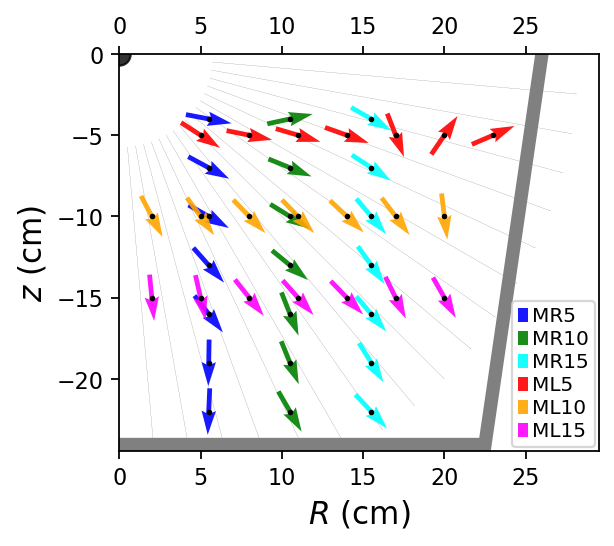

In [17]:
fig,ax = plt.subplots(1,1,figsize=(3.7,3.4),dpi=160)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.18,left=0.18,right=0.99)
dotop = 1; 
if (dotop==1):
    ax.xaxis.set_tick_params(labeltop='on',top=True)
    plt.subplots_adjust(hspace=0,wspace=0,top=0.93, bottom=0.18,left=0.18,right=0.99)

x = []
x = np.append(ds_L5.Rcoords,x)
x = np.append(ds_L10.Rcoords,x)
x = np.append(ds_L15.Rcoords,x)
x = np.append(ds_R5.Rcoords,x)
x = np.append(ds_R10.Rcoords,x)
x = np.append(ds_R15.Rcoords,x)
x *=100
y = []
y = np.append(ds_L5.zcoords,y)
y = np.append(ds_L10.zcoords,y)
y = np.append(ds_L15.zcoords,y)
y = np.append(ds_R5.zcoords,y)
y = np.append(ds_R10.zcoords,y)
y = np.append(ds_R15.zcoords,y)
y *= 100

# compute standard deviation! all points
theta_xy = np.arctan2(y,x)
a_theta_vec = []
a_theta_vec = np.append(ms_L5.a_theta,a_theta_vec)
a_theta_vec = np.append(ms_L10.a_theta,a_theta_vec)
a_theta_vec = np.append(ms_L15.a_theta,a_theta_vec)
a_theta_vec = np.append(ms_R5.a_theta,a_theta_vec)
a_theta_vec = np.append(ms_R10.a_theta,a_theta_vec)
a_theta_vec = np.append(ms_R15.a_theta,a_theta_vec)
sig_theta = np.std(theta_xy - a_theta_vec)*180/np.pi
print('standard deviation of difference is {:.1f} deg'.format(sig_theta))
# standard deviation is 22 degrees


r = np.sqrt(x*x + y*y)
#ax.quiver(x,y,np.cos(theta_xy),np.sin(theta_xy),scale=0.4,scale_units='xy',pivot='mid',color='black', width=0.001)
#ax.quiver(0*x,0*y,r*np.cos(theta_xy),r*np.sin(theta_xy),scale=0.4,scale_units='xy',pivot='mid',color='black', width=0.001)

ttt = np.linspace(0,2*np.pi,73)
tttx = np.cos(ttt)
ttty = np.sin(ttt)
r1 = 17; r2=9
ax.quiver(r1*tttx,r1*ttty,r2*tttx,r2*ttty,scale=0.4,scale_units='xy',pivot='mid',\
          color='black', width=0.0005,alpha=0.5)  # thin grey radial rays

ax.plot([0],[0],'ko',alpha=0.8,ms=10)  #origin
ax.plot([22.5,26],[-24,0],'-',lw=6,color='grey') # tub outline!
ax.plot([0,22.2],[-24,-24],'-',lw=6,color='grey')

ax.set_xlim([0,29.5])
ax.set_ylim([-24.4,0])
ax.set_aspect('equal')
mscale=0.35
malpha=0.9
mwidth=0.01
k=0;  ax.quiver( ds_R5.Rcoords*1e2,ds_R5.zcoords*1e2, np.cos(ms_R5.a_theta) , np.sin(ms_R5.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)
k+=1; ax.quiver(ds_R10.Rcoords*1e2,ds_R10.zcoords*1e2,np.cos(ms_R10.a_theta), np.sin(ms_R10.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)
k+=1; ax.quiver(ds_R15.Rcoords*1e2,ds_R15.zcoords*1e2,np.cos(ms_R15.a_theta),np.sin(ms_R15.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)
k+=1; ax.quiver(ds_L5.Rcoords*1e2,ds_L5.zcoords*1e2, np.cos(ms_L5.a_theta), np.sin(ms_L5.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)
k+=1; ax.quiver(ds_L10.Rcoords*1e2,ds_L10.zcoords*1e2, np.cos(ms_L10.a_theta),np.sin(ms_L10.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)
k+=1; ax.quiver(ds_L15.Rcoords*1e2,ds_L15.zcoords*1e2, np.cos(ms_L15.a_theta),np.sin(ms_L15.a_theta),label=mlabellist[k],\
         scale=mscale,scale_units='xy',pivot='mid',color=colorlist[k],width=mwidth,alpha=malpha)

ax.plot(x,y,'k.',ms=3) # black dots for accelerometer positions

ax.set_ylabel(r'$z$ (cm)',fontsize=14)
ax.set_xlabel(r'$R$ (cm)',fontsize=14)


plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=0.5,handletextpad=0.2,borderaxespad=0.2,\
           ncol=1,columnspacing=0.3,loc='lower right',markerscale=0.3,fontsize=9)


plt.savefig(oroot+'theta_a.png')

In [60]:
#Discarding last position in all data sets, as requested by referee
# comppute standard devation
x_short = []
x_short = np.append(ds_L5.Rcoords[0:6] ,x_short)
x_short = np.append(ds_L10.Rcoords[0:6],x_short)
x_short = np.append(ds_L15.Rcoords[0:6],x_short)
x_short = np.append(ds_R5.Rcoords[0:6] ,x_short)
x_short = np.append(ds_R10.Rcoords[0:6],x_short)
x_short = np.append(ds_R15.Rcoords[0:6],x_short)
x_short *=100
y_short = []
y_short = np.append(ds_L5.zcoords[0:6] ,y_short)
y_short = np.append(ds_L10.zcoords[0:6],y_short)
y_short = np.append(ds_L15.zcoords[0:6],y_short)
y_short = np.append(ds_R5.zcoords[0:6] ,y_short)
y_short = np.append(ds_R10.zcoords[0:6],y_short)
y_short = np.append(ds_R15.zcoords[0:6],y_short)
y_short *= 100

theta_xy_short = np.arctan2(y_short,x_short)
a_theta_vec_short = []
a_theta_vec_short = np.append(ms_L5.a_theta[0:6] ,a_theta_vec_short)
a_theta_vec_short = np.append(ms_L10.a_theta[0:6],a_theta_vec_short)
a_theta_vec_short = np.append(ms_L15.a_theta[0:6],a_theta_vec_short)
a_theta_vec_short = np.append(ms_R5.a_theta[0:6], a_theta_vec_short)
a_theta_vec_short = np.append(ms_R10.a_theta[0:6],a_theta_vec_short)
a_theta_vec_short = np.append(ms_R15.a_theta[0:6],a_theta_vec_short)
sig_theta_short = np.std(theta_xy_short - a_theta_vec_short)*180/np.pi
print('standard deviation of difference is {:.1f} deg'.format(sig_theta_short))
# standard deviation is 20 degrees


standard deviation of difference is 20.5 deg


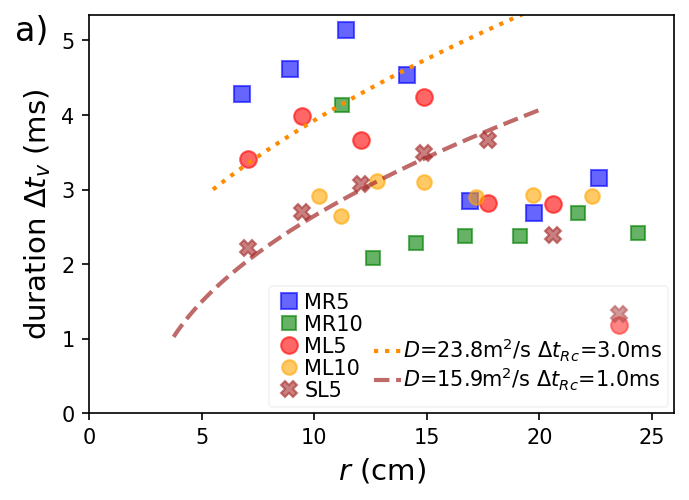

In [422]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2,left=0.2,right=0.98)
ms_SL5.v_fwhm[-1] = -0.0001  # get rid of this point

k=0;  ax.plot(ds_R5.rcoords*1e2 ,ms_R5.v_fwhm*1e3,'s' ,label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,ms_R10.v_fwhm*1e3,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; #ax.plot(ds_R15.rcoords*1e2,ms_R15.v_fwhm*1e3,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L5.rcoords*1e2 ,ms_L5.v_fwhm*1e3,'o' ,label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,ms_L10.v_fwhm*1e3,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; #ax.plot(ds_L15.rcoords*1e2,ms_L15.v_fwhm*1e3,'o',label=mlabellist[k],ms=6,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5.v_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,ms_SL5_2.v_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.set_ylabel(r'duration $\Delta t_v$ (ms)',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=26)

xvec = np.linspace(R_crater*1e2,20,100)
xvec_m = xvec/100
Sxvec = np.linspace(SR_crater*1e2,20,100)
Sxvec_m = Sxvec/100

C_W = 12; 
D = 0.003*v_p*C_W**2  # only for millet 3mm
fac = 3.0
dt0 = R_crater/v_p*fac
Dlabel = r'$D$={:.1f}m$^2$/s'.format(D)
dtr = r' $\Delta t_R}$' + r'$_c$'
tlabel = r'={:.1f}ms'.format(dt0*1e3)
yvec1 = np.sqrt((xvec_m- R_crater)*D*v_p**-3.0 + dt0**2) *1e3

SC_W = 31;   #was 30
SD = 0.0003*v_p*SC_W**2  # sand 0.3mm
Sfac = 1.5  # was 1.5
Sdt0 = SR_crater/v_p *Sfac
SDlabel = r'$D$={:.1f}m$^2$/s'.format(SD)
Stlabel = r'={:.1f}ms'.format(Sdt0*1e3)
yvec2 = np.sqrt((Sxvec_m- SR_crater)*SD*v_p**-3.0 + Sdt0**2) *1e3
#slabel = r'$C_W$={:.0f}'.format(C_W)


ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec1,':',color='darkorange',label=Dlabel+dtr+tlabel,lw=2)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot(Sxvec,yvec2,'--',color='brown',label=SDlabel+dtr+Stlabel,lw=2,alpha=0.7)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)

plt.legend(borderpad=0.3,labelspacing=0.1,handlelength=1.3,handletextpad=0.1,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower right',framealpha=0.2)
ax.text(-3.3,5.0,'a)',fontsize=16)
plt.savefig(oroot+'fwhm_v.png')

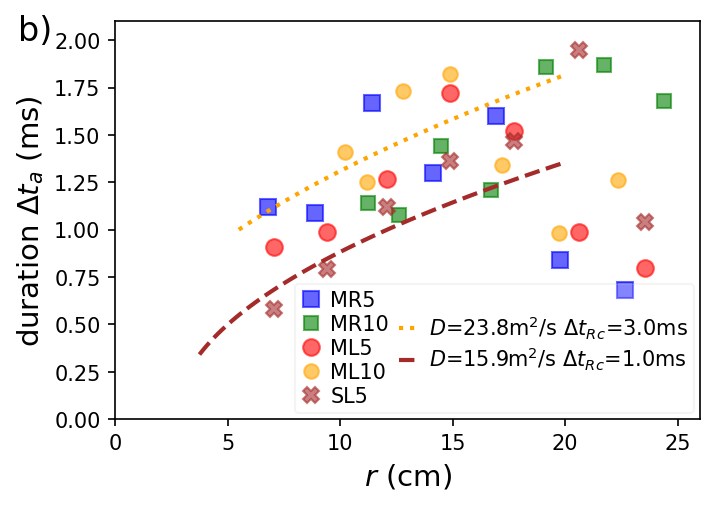

In [423]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2,left=0.2,right=0.98)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,ms_R5.a_fwhm*1e3 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,ms_R10.a_fwhm*1e3,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; #ax.plot(ds_R15.rcoords*1e2,ms_R15.a_fwhm*1e3,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L5.rcoords*1e2 ,ms_L5.a_fwhm*1e3 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,ms_L10.a_fwhm*1e3,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; #ax.plot(ds_L15.rcoords*1e2,ms_L15.a_fwhm*1e3,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5.a_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,ms_SL5_2.a_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.set_ylabel(r'duration $\Delta t_a$ (ms)',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0,top=2.1)
ax.set_xlim(left=0,right=26)

#xvec = np.linspace(R_crater*1e2,20,100)
#xvec_m = xvec/100
#Sxvec = np.linspace(SR_crater*1e2,20,100)
#Sxvec_m = Sxvec/100

#C_W = 12; 
#D = 0.003*v_p*C_W**2  # only for millet 3mm
#fac1 = 3.0
#dt0 = R_crater/v_p*fac1
#tlabel = r'={:.1f}ms'.format(dt0*1e3)
#Dlabel = r'$D$={:.1f}m$^2$/s'.format(D)
#yvec1 = np.sqrt((xvec_m- R_crater)*D*v_p**-3.0 + dt0**2) *1e3 

#SC_W = 15; 
#SD = 0.0003*v_p*SC_W**2  # for sand 0.3 mm
#Sfac = 1.5
#Sdt0 = SR_crater/v_p *Sfac
#Stlabel = r'={:.1f}ms'.format(Sdt0*1e3)
#SDlabel = r'$D$={:.1f}m$^2$/s'.format(SD)
#yvec2 = np.sqrt((Sxvec_m- SR_crater)*SD*v_p**-3.0 + Sdt0**2) *1e3
#slabel = r'$C_W$={:.0f}'.format(C_W)

v_a_corr = 3


ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec1/v_a_corr,':',color='orange',label=Dlabel+dtr+tlabel,lw=2)
ax.plot(Sxvec,yvec2/v_a_corr,'--',color='brown',label=SDlabel+dtr+Stlabel,lw=2)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)


plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower right',framealpha=0.2)
#ax.text(-4,2.7,'b)',fontsize=16)
ax.text(-4.3,2.0,'b)',fontsize=16)
plt.savefig(oroot+'fwhm_a.png')  #  we will add it now to Paper

In [20]:
C_D=1.
alpha = (3.0/8.0)*(C_D/R_p)*(rho_s/rho_p)
Salpha = (3.0/8.0)*(C_D/SR_p)*(Srho_s/Srho_p)
print('                           Millet  Sand ')
print('alpha_p (m-1)            {:11.3f} {:.3f}  '.format(alpha,Salpha))
print('1/alpha_p (cm)           {:11.3f} {:.3f} '.format(100/alpha,100/Salpha))
print('1/(alpha_p vimpact) (ms) {:11.1f} {:.1f}  '.format(1.e3/(alpha*v_impact),1.e3/(Salpha*Sv_impact)))
beta_eff = 4
Sbeta_eff = 7
vpk_Rcrater  = C_D/2.0  * beta_eff * (R_p/R_crater)**2   *  v_impact**2/v_p
Svpk_Rcrater = C_D/2.0 * Sbeta_eff * (SR_p/SR_crater)**2 * Sv_impact**2/v_p
apk_Rcrater  = vpk_Rcrater  * v_p/R_crater
Sapk_Rcrater = Svpk_Rcrater * v_p/SR_crater
EJ_Rcrater  =  rho_s *  vpk_Rcrater**2 * 2*np.pi* R_crater**3
SEJ_Rcrater = Srho_s * Svpk_Rcrater**2 * 2*np.pi*SR_crater**3
print('vpkRc (m/s)              {:11.3f} {:.3f} '.format(vpk_Rcrater,Svpk_Rcrater))
print('apkRc (m^2/s)            {:11.3f} {:.3f} '.format(apk_Rcrater,Sapk_Rcrater))
print('EJRc (J)                 {:11.4f} {:.4f} '.format(EJ_Rcrater,SEJ_Rcrater))

                           Millet  Sand 
alpha_p (m-1)                 14.375 15.160  
1/alpha_p (cm)                 6.957 6.596 
1/(alpha_p vimpact) (ms)        15.6 13.9  
vpkRc (m/s)                    0.080 0.203 
apkRc (m^2/s)                 79.693 297.417 
EJRc (J)                      0.0050 0.0204 


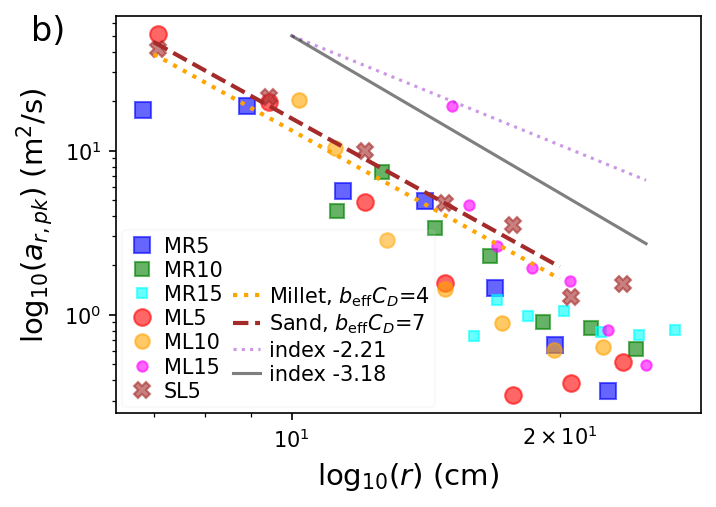

In [352]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)
#colorlist = ['blue','green','cyan','red','orange']
a_R5  = ms_R5.a_pk
a_R10 = ms_R10.a_pk
a_R15 = ms_R15.a_pk
a_L5  = ms_L5.a_pk
a_L10 = ms_L10.a_pk
a_L15 = ms_L15.a_pk
a_SL5  = ms_SL5.a_pk
a_SL5_2  = ms_SL5_2.a_pk

xvec = np.linspace(7,20,100)  #cm 
rvec_norm1 = xvec*1e-2/R_crater  # unitless r/R_cr
rvec_norm2 = xvec*1e-2/SR_crater

# our predicted power law
alpha1=-3.0; 
yvec1 = rvec_norm1**alpha1*apk_Rcrater
yvec2 = rvec_norm2**alpha1*Sapk_Rcrater
befflab = r'$b_\mathrm{eff}$'+ r'$C_D$' + '=' 
alabel1 = r'Millet, '+ befflab +'{:.0f}'.format(beta_eff) 
alabel2 = r'Sand, '  + befflab +'{:.0f}'.format(Sbeta_eff)

# power laws of Yasui+15, Mastue+20
alpha_Y15 = -2.21; a_Y15 = 50.0
alpha_M20 = -3.18; a_M20 = a_Y15
xvec2 = np.linspace(10,25,100)
yvec_Y15 = (xvec2/10)**alpha_Y15*a_Y15 
yvec_M20 = (xvec2/10)**alpha_M20*a_M20 
alabel_Y15 = 'index {:.2f}'.format(alpha_Y15) 
alabel_M20 = 'index {:.2f}'.format(alpha_M20) 

k=0;  ax.plot(ds_R5.rcoords*1e2 ,a_R5 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,a_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,a_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,a_L5 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,a_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,a_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,a_SL5 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,a_SL5_2 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])


ax.plot([0],[0],'.',color='white',label=' ')
ax.plot([0],[0],'.',color='white',label=' ')
ax.plot(xvec,yvec1,':',color='orange',label=alabel1,lw=2)
ax.plot(xvec,yvec2,'--',color='brown',label=alabel2,lw=2)
ax.plot(xvec2,yvec_Y15,':',color='darkorchid',label=alabel_Y15,lw=1.5,alpha=0.5)
ax.plot(xvec2,yvec_M20,'-',color='black',label=alabel_M20,lw=1.5,alpha=0.5)


ax.set_ylabel(r'log$_{10}(a_{r,pk})$ (m$^2$/s)',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1.3,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,framealpha=0.1)
ax.text(5.1,47,'b)',fontsize=16)
plt.savefig(oroot+'apk_new.png')

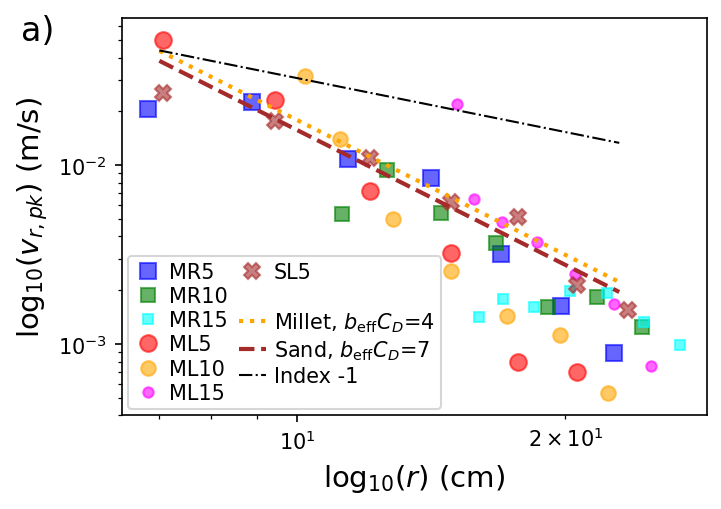

In [350]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)
#colorlist = ['blue','green','cyan','red','orange']
v_R5  = ms_R5.v_pk
v_R10 = ms_R10.v_pk
v_R15 = ms_R15.v_pk
v_L5  = ms_L5.v_pk
v_L10 = ms_L10.v_pk
v_L15 = ms_L15.v_pk
v_SL5  = ms_SL5.v_pk
v_SL5_2  = ms_SL5_2.v_pk

xvec = np.linspace(7,23,100)
rvec_norm1 = xvec*1e-2/R_crater
rvec_norm2 = xvec*1e-2/SR_crater

alpha1=-2.5; 
yvec1 = rvec_norm1**alpha1*vpk_Rcrater
yvec2 = rvec_norm2**alpha1*Svpk_Rcrater*0.9
befflab = r'$b_\mathrm{eff}$' +  r'$C_D$'+ '=' 
alabel1 = r'Millet, ' + befflab + '{:.0f}'.format(beta_eff)
alabel2 = r'Sand, '   + befflab + '{:.0f}'.format(Sbeta_eff)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,v_R5, 's',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,v_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,v_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,v_L5, 'o',label=mlabellist[k] ,ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,v_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,v_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2 ,v_SL5,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2 ,v_SL5_2,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ')
ax.plot(xvec,yvec1,':',color='orange',label=alabel1,lw=2)
ax.plot(xvec,yvec2,'--',color='brown',label=alabel2,lw=2)

yvec3 = rvec_norm1**-1*vpk_Rcrater*0.7
ax.plot(xvec,yvec3,'-.',color='black',label='Index -1',lw=1)

ax.set_ylabel(r'log$_{10}(v_{r,pk})$ (m/s)',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)

#avec = (xvec/v_p)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(bottom=4e-4)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1.3,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5)
ax.text(4.9,0.05,'a)',fontsize=16)
plt.savefig(oroot+'vpk_new.png')

E=0.009042 (J)
E=0.004344 (J)
E=0.000111 (J)
E=0.000035 (J)
E=0.000038 (J)
E=0.000021 (J)
E=0.000016 (J)
E=0.005779 (J)
E=0.001112 (J)
E=0.000230 (J)
E=0.000091 (J)
E=0.000042 (J)
E=0.000058 (J)
E=0.000018 (J)
E=0.005605 (J)
E=0.000510 (J)
E=0.000271 (J)
E=0.000209 (J)
E=0.000073 (J)
E=0.000073 (J)
E=0.000058 (J)
E=0.002170 (J)
E=0.004630 (J)
E=0.002287 (J)
E=0.001424 (J)
E=0.000015 (J)
E=0.000049 (J)
E=0.000011 (J)
E=0.000274 (J)
E=0.000526 (J)
E=0.000169 (J)
E=0.000115 (J)
E=0.000002 (J)
E=0.000010 (J)
E=0.000078 (J)
E=0.000039 (J)
E=0.000018 (J)
E=0.000044 (J)
E=0.000065 (J)
E=0.000054 (J)
E=0.000014 (J)
E=0.000007 (J)


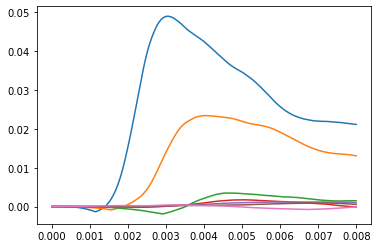

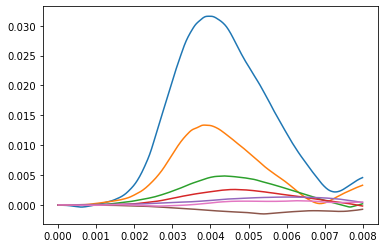

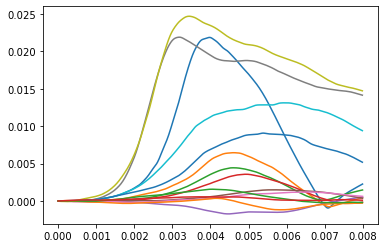

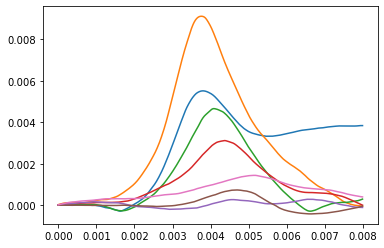

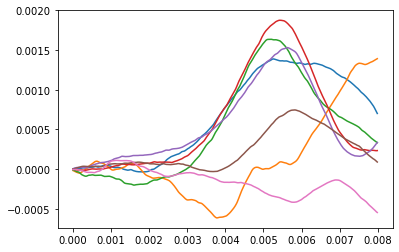

In [23]:
v_p = 55.0
tleft=0; tright=0.008
EJ_L5=find_energy_ds(ds_L5,tleft,tright,v_p,rho_s)
plt.figure()
tleft=0; #tright=0.010
EJ_L10=find_energy_ds(ds_L10,tleft,tright,v_p,rho_s)
plt.figure()
EJ_L15=find_energy_ds(ds_L15,tleft,tright,v_p,rho_s)
tleft=0; #tright=0.010
EJ_R5=find_energy_ds(ds_R5,tleft,tright,v_p,rho_s)
plt.figure()
tleft=0; #tright=0.010
EJ_R10=find_energy_ds(ds_R10,tleft,tright,v_p,rho_s)
plt.figure()
EJ_R15=find_energy_ds(ds_R15,tleft,tright,v_p,rho_s)

E=0.005785 (J)
E=0.006320 (J)
E=0.007249 (J)
E=0.001107 (J)
E=0.001586 (J)
E=0.000348 (J)
E=0.000062 (J)
E=0.004723 (J)
E=0.006973 (J)
E=0.004027 (J)
E=0.000957 (J)
E=0.000988 (J)
E=0.000256 (J)
E=0.000413 (J)


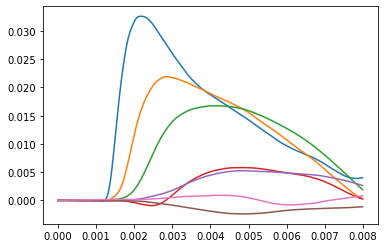

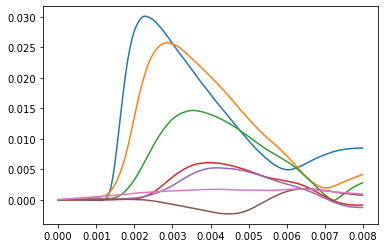

In [24]:
v_p = 55.0
tleft=0; tright=0.008
EJ_SL5=find_energy_ds(ds_SL5,tleft,tright,v_p,Srho_s)
plt.figure()
EJ_SL5_2=find_energy_ds(ds_SL5_2,tleft,tright,v_p,Srho_s)

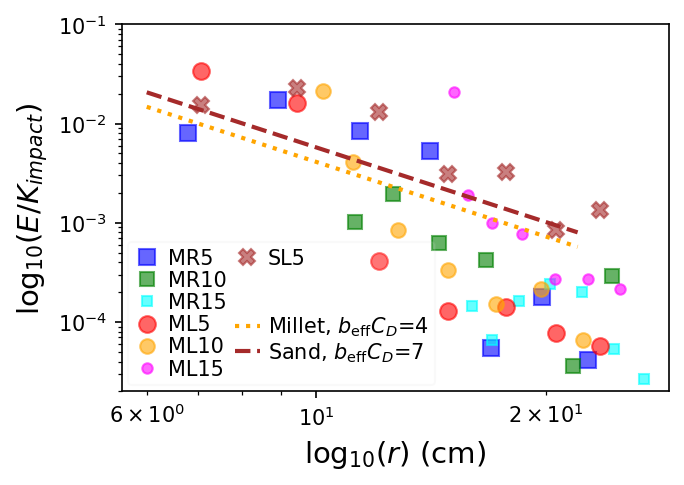

In [351]:
fig,ax = plt.subplots(1,1,figsize=(5.0,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.26, left=0.25,right=0.98)

xvec = np.linspace(6,22,100)
rvec_norm1 = xvec*1e-2/R_crater
rvec_norm2 = xvec*1e-2/SR_crater

alpha1=-2.5; 
yvec1 = rvec_norm1**alpha1*EJ_Rcrater /K_impact
yvec2 = rvec_norm2**alpha1*SEJ_Rcrater/SK_impact
befflab = r'$b_\mathrm{eff}$' + r'$C_D$'+'=' 
alabel1 = r'Millet, '+ befflab+'{:.0f}'.format(beta_eff)
alabel2 = r'Sand, '  + befflab+'{:.0f}'.format(Sbeta_eff)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,EJ_R5/K_impact ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,EJ_R10/K_impact,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,EJ_R15/K_impact,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,EJ_L5/K_impact ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,EJ_L10/K_impact,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,EJ_L15/K_impact,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,EJ_SL5/SK_impact,'h',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,EJ_SL5_2/SK_impact,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
#ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec1,':',color='orange',label=alabel1,lw=2)
ax.plot(xvec,yvec2,'--',color='brown',label=alabel2,lw=2)

yvec3 = rvec_norm1**-1*(EJ_Rcrater /K_impact)*0.1
#ax.plot(xvec,yvec3,'-.',color='black',label='Index -1',lw=1)


ax.set_ylabel(r'log$_{10}(E/K_{impact})$',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.00002,0.1])

#vlab = r'{:.0f} m/s'.format(v_p)
#ax.plot(xvec*100,tvec*1e3,':',label=vlab,color='grey')

plt.legend(borderpad=0.3,labelspacing=0.1,handlelength=1.2,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.4,framealpha=0.1, loc='lower left')
plt.savefig(oroot+'EJ_new.png')

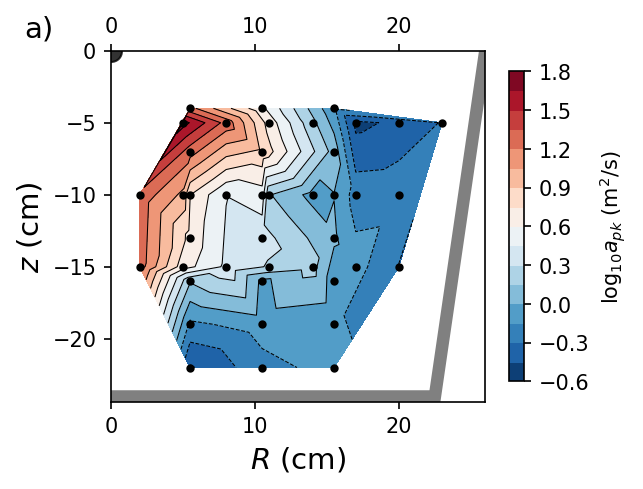

In [26]:
x = []
x = np.append(ds_L5.Rcoords,x)
x = np.append(ds_L10.Rcoords,x)
x = np.append(ds_L15.Rcoords,x)
x = np.append(ds_R5.Rcoords,x)
x = np.append(ds_R10.Rcoords,x)
x = np.append(ds_R15.Rcoords,x)
x *=100
y = []
y = np.append(ds_L5.zcoords,y)
y = np.append(ds_L10.zcoords,y)
y = np.append(ds_L15.zcoords,y)
y = np.append(ds_R5.zcoords,y)
y = np.append(ds_R10.zcoords,y)
y = np.append(ds_R15.zcoords,y)
y *= 100

fig,ax = plt.subplots(1,1,figsize=(4.8,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.16, left=0.20,right=0.85)
dotop = 1; 
if (dotop==1):
    ax.xaxis.set_tick_params(labeltop='on',top=True)
    plt.subplots_adjust(hspace=0,wspace=0,top=0.92, bottom=0.16,left=0.20,right=0.85)


z= []
z = np.append(ms_L5.a_pk,z)
z = np.append(ms_L10.a_pk,z)
z = np.append(ms_L15.a_pk,z)
z = np.append(ms_R5.a_pk,z)
z = np.append(ms_R10.a_pk,z)
z = np.append(ms_R15.a_pk,z)
z = np.log10(z)
ax.plot([0],[0],'ko',alpha=0.8,ms=10)
ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax,label=r'log$_{10} a_{pk}$ (m$^2$/s)',shrink=0.8)
ax.set_xlabel(r'$R$ (cm)',fontsize=14)
ax.set_ylabel(r'$z$ (cm)',fontsize=14)
ax.set_aspect('equal')
ax.plot(x,y,'.',color='black')
#ax.set_xlim([0,25])
#ax.set_ylim([-23,0])

ax.set_xlim([0,26.0]);  ax.set_ylim([-24.4,0])
ax.plot([22.5,26],[-24,0],'-',lw=6,color='grey')# tub outline!
ax.plot([0,22.2],[-24,-24],'-',lw=6,color='grey')


if (dotop==1):
    ax.text(-6,1,'a)',fontsize=14)
else:
    ax.text(-6,-1,'a)',fontsize=14)
fig.savefig(oroot+'apk_2d.png')

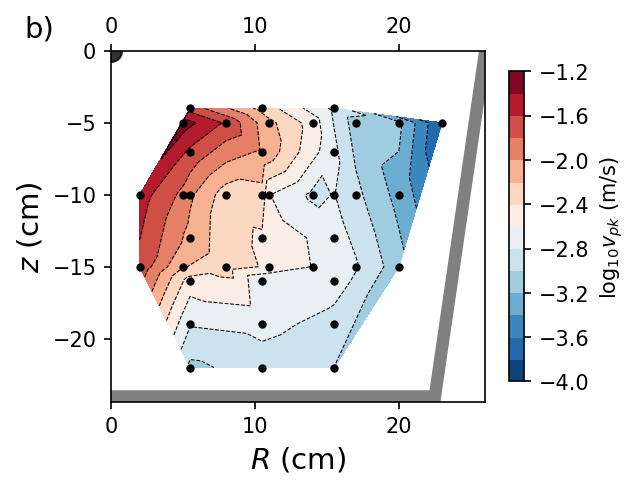

In [27]:
fig,ax = plt.subplots(1,1,figsize=(4.8,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.16, left=0.2,right=0.85)
dotop = 1; 
if (dotop==1):
    ax.xaxis.set_tick_params(labeltop='on',top=True)
    plt.subplots_adjust(hspace=0,wspace=0,top=0.92, bottom=0.16,left=0.2,right=0.85)

z= []
z = np.append(ms_L5.v_pk,z)
z = np.append(ms_L10.v_pk,z)
z = np.append(ms_L15.v_pk,z)
z = np.append(ms_R5.v_pk,z)
z = np.append(ms_R10.v_pk,z)
z = np.append(ms_R15.v_pk,z)
z = np.log10(z)
ax.plot([0],[0],'ko',alpha=0.8,ms=10)
ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax,label=r'log$_{10} v_{pk}$ (m/s)',shrink=0.8)
ax.set_xlabel(r'$R$ (cm)',fontsize=14)
ax.set_ylabel(r'$z$ (cm)',fontsize=14)
ax.set_aspect('equal')
ax.plot(x,y,'.',color='black')
#ax.set_xlim([0,25])
#ax.set_ylim([-23,0])

ax.set_xlim([0,26.0]);  ax.set_ylim([-24.4,0])
ax.plot([22.5,26],[-24,0],'-',lw=6,color='grey')# tub outline!
ax.plot([0,22.2],[-24,-24],'-',lw=6,color='grey')


if (dotop==1):
    ax.text(-6,1,'b)',fontsize=14)
else:
    ax.text(-6,-1,'b)',fontsize=14)
fig.savefig(oroot+'vpk_2d.png')

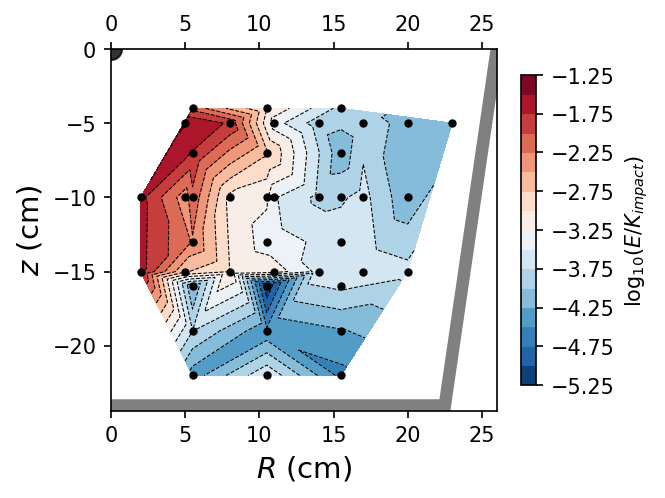

In [28]:
z= []
z = np.append(EJ_L5/K_impact,z)
z = np.append(EJ_L10/K_impact,z)
z = np.append(EJ_L15/K_impact,z)
z = np.append(EJ_R5/K_impact,z)
z = np.append(EJ_R10/K_impact,z)
z = np.append(EJ_R15/K_impact,z)

z = np.log10(z)


fig,ax = plt.subplots(1,1,figsize=(4.8,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.16, left=0.2,right=0.85)
dotop = 1; 
if (dotop==1):
    ax.xaxis.set_tick_params(labeltop='on',top=True)
    plt.subplots_adjust(hspace=0,wspace=0,top=0.92, bottom=0.16,left=0.18,right=0.85)

ax.plot([0],[0],'ko',alpha=0.8,ms=10)
ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax,label=r'log$_{10}(E/K_{impact})$',shrink=0.8)
ax.plot(x,y,'.',color='black')

ax.set_xlabel(r'$R$ (cm)',fontsize=14)
ax.set_ylabel(r'$z$ (cm)',fontsize=14)
ax.set_aspect('equal')
ax.set_xlim([0,26.0]);  ax.set_ylim([-24.4,0])
ax.plot([22.5,26],[-24,0],'-',lw=6,color='grey')# tub outline!
ax.plot([0,22.2],[-24,-24],'-',lw=6,color='grey')
#ax.set_xlim([0,25]) ;ax.set_ylim([-23,0])

fig.savefig(oroot+'EJ_2d.png')

In [503]:
def mknice(data,swin):
    mdata = np.copy(data)
    mdata = savgol_filter(mdata,swin,2)
    mdata -= np.mean(mdata[0:20])
    mdata /= max(mdata)
    return mdata 

# no longer used, just tried MR5, no better
t8 = ds_R5.tarr_d[Rii]*1e3-1.9+ddd1;  
d8= np.squeeze(ds_L5.aset_r[ii,0])
d8/= max(d8)
t9 = ds_R5.tarr_d[Rii]*1e3-2.1+ddd1; 
swin=31
d9=savgol_filter(np.squeeze(ds_R5.aset_r[Rii,1]),swin,2)
d9/= max(d9)
t10 = ds_R5.tarr_d[Rii]*1e3-3.0+ddd1; 
swin=41
d10= savgol_filter(np.squeeze(ds_R5.aset_r[Rii,2]),swin,2)
jj = np.argmin(np.fabs(t10+2))
d10-= np.median(d10[jj:jj+100])
d10/= max(d10)
#jj = np.argmin(abs(t2+2))
#d10 -= 12
#junk = np.linspace(0,1,len(d2))  # add a line to straighten it out
#d10 += junk*15
t11 = ds_R5.tarr_d[Rii]*1e3-3.3+ddd1; 
swin=41
d11= savgol_filter(np.squeeze(ds_R5.aset_r[Rii,3]),swin,2)
jj = np.argmin(np.fabs(t11+2))
d11-= np.median(d11[jj:jj+100])
d11/= max(d11)

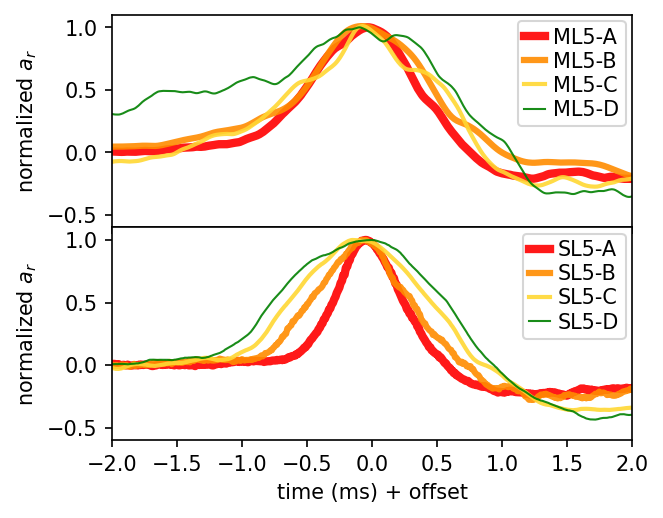

In [677]:
fac=1; tleft = -0.002; tright=0.007; av=1; ofile=''; label='ML5_'
fig,axarr = plt.subplots(2,1,figsize=(4.5,3.5),\
            dpi=150,sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0,top=0.97, bottom=0.16, left=0.2,right=0.97)

gold = [1.0, 0.8431372549019608, 0.2, 1.0]
ch_colorlist = ['red','darkorange',gold,'green','cyan','blue','purple'] #for channels


ii = (ds_L5.tarr_d >= tleft) & (ds_L5.tarr_d < tright)
Rii = (ds_R5.tarr_d >= tleft) & (ds_R5.tarr_d < tright)
Sii = (ds_SL5.tarr_d >= tleft) & (ds_SL5.tarr_d < tright)
S2ii = (ds_SL5_2.tarr_d >= tleft) & (ds_SL5_2.tarr_d < tright)
ddd1 = -0.35; 

line1 = np.linspace(0,1,len(d2))  # add a line to straighten it out

xmin = -2.0; xmax = 2.0;
aset = ds_L5.aset_r
t0 = ds_L5.tarr_d[ii]*1e3-1.9+ddd1;  
d0= mknice(np.squeeze(aset[ii,0]),3)
t1 = ds_L5.tarr_d[ii]*1e3-2.57+ddd1; 
swin=41
d1=mknice(np.squeeze(aset[ii,1]),swin)*1.01
t2 = ds_L5.tarr_d[ii]*1e3-3.37+ddd1; 
swin=51
d2=mknice(np.squeeze(aset[ii,2]),swin)
d2 += line1*0.6
jj = np.argmin(np.fabs(t2+2))
d2 -= np.median(d2[jj:jj+100])
d2 /= max(d2); d2 *= 1.01
#d2 += line1*15
t3 = ds_L5.tarr_d[ii]*1e3-4.0; 
swin=51
d3= mknice(np.squeeze(aset[ii,3]),swin) 
#jj = np.argmin(np.fabs(t3+2))
#d3-= np.median(d3[jj:jj+100])
#d3/= max(d3)
#d3+= line1*100

aset = ds_SL5_2.aset_r
t4=ds_SL5_2.tarr_d[S2ii]*1e3-1.27+ddd1;
d4=mknice(np.squeeze(aset[S2ii,0]),3)
t5=ds_SL5_2.tarr_d[S2ii]*1e3-1.65+ddd1
d5=mknice(np.squeeze(aset[S2ii,1]),3)
t6=ds_SL5_2.tarr_d[S2ii]*1e3-2.0+ddd1
swin=31
d6=mknice(np.squeeze(aset[S2ii,2]),swin)
t7 = ds_SL5_2.tarr_d[S2ii]*1e3-2.3+ddd1; 
swin=41
d7=mknice(np.squeeze(aset[S2ii,3]),swin)

axarr[0].plot(t0,d0,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='ML5-A')
axarr[0].plot(t1,d1,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='ML5-B')
axarr[0].plot(t2,d2,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='ML5-C')
axarr[0].plot(t3,d3,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='ML5-D')
#axarr[0].plot([0],[0],'-',color='white',lw=1,alpha=0.9,label=' ')

dy = 0.0
axarr[1].plot(t4,d4-dy,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='SL5-A')
axarr[1].plot(t5,d5-dy,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='SL5-B')
axarr[1].plot(t6,d6-dy,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='SL5-C')
axarr[1].plot(t7,d7-dy,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='SL5-D')

#dy2 = 2
#ax.plot(t8,d8-dy2,'-',color='red',lw=3,alpha=0.7,label='MR5-A')
#ax.plot(t9,d9-dy2,':',color='darkorange',lw=2,alpha=0.9,label='MR5-B')
#ax.plot(t10,d10-dy2,'-.',color='brown',lw=1,alpha=0.8,label='MR5-C')
#ax.plot(t11,d11-dy2,':',color='black',lw=1,alpha=0.8,label='MR5-D')

axarr[0].set_ylabel(r'normalized $a_r$') # ,fontsize=14)
axarr[1].set_ylabel(r'normalized $a_r$') # ,fontsize=14)
axarr[1].set_xlabel('time (ms) + offset')# ,fontsize=14)
axarr[1].set_xlim([xmin,xmax])
axarr[1].set_ylim([-0.6,1.1])
axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
#ax.text(-1.7,0.7,'ML5',fontsize=14)
#ax.text(-1.7,-0.5,'SL5',fontsize=14)

#ax.set_ylim([-80,61])
plt.savefig(oroot+'broad.png',dpi=150)

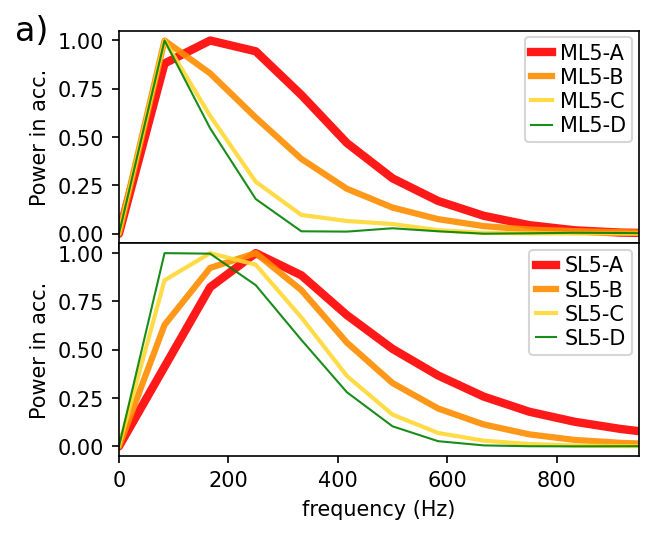

In [678]:
# compute fourier transform, make power spectrum
def ps_freq(data,time_step,junk):  
    nd = len(data)
    hann = np.hanning(nd)  # use hanning window function 
    mdata = np.copy(data)*hann
    mdata -= np.mean(mdata)
    ps = np.abs(np.fft.fft(mdata))**2
    
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)

    #plt.plot(freqs[idx], ps[idx])
    return freqs[idx],ps[idx]


def ps_freq_frac(data,time_step,frac_han):  
    nd = len(data)
    windowfun = np.zeros(nd)
    nw = int(frac_han*nd)  # hanning only used for the center of the total data set
    istart = int((nd-nw)/2)
    hann = np.hanning(nw)
    windowfun[istart:istart+nw] = hann
    mdata = np.copy(data)*windowfun
    mdata -= np.mean(mdata)
    ps = np.abs(np.fft.fft(mdata))**2
    
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)

    #plt.plot(freqs[idx], ps[idx])
    return freqs[idx],ps[idx]



tleft = -0.004; tright=tleft+0.012;
ii_a = (ds_L5.tarr_d >= tleft) & (ds_L5.tarr_d < tright)
#ds_L5.aset_R[ii,1]
time_step = ds_L5.tarr_d[1] - ds_L5.tarr_d[0]

ffrac = 0.6
aset = ds_L5.aset_r
freqs_L5_0,ps_L5_0  = ps_freq_frac(np.squeeze(aset[ii_a,0]),time_step,ffrac)
freqs_L5_1,ps_L5_1  = ps_freq_frac(np.squeeze(aset[ii_a,1]),time_step,ffrac)
freqs_L5_2,ps_L5_2  = ps_freq_frac(np.squeeze(aset[ii_a,2]),time_step,ffrac)
freqs_L5_3,ps_L5_3  = ps_freq_frac(np.squeeze(aset[ii_a,3]),time_step,ffrac)

Stleft = tleft; Stright=tright;
Stime_step = ds_SL5.tarr_d[1] - ds_SL5.tarr_d[0]
Sii_a = (ds_SL5_2.tarr_d >= Stleft) & (ds_SL5_2.tarr_d < Stright)
aset = ds_SL5_2.aset_r
freqs_SL5_0,ps_SL5_0  = ps_freq_frac(np.squeeze(aset[Sii_a,0]),Stime_step,ffrac)
freqs_SL5_1,ps_SL5_1  = ps_freq_frac(np.squeeze(aset[Sii_a,1]),Stime_step,ffrac)
freqs_SL5_2,ps_SL5_2  = ps_freq_frac(np.squeeze(aset[Sii_a,2]),Stime_step,ffrac)
freqs_SL5_3,ps_SL5_3  = ps_freq_frac(np.squeeze(aset[Sii_a,3]),Stime_step,ffrac)

fig,axarr = plt.subplots(2,1,figsize=(4.5,3.5),\
            dpi=150,sharex=True,sharey=False)
plt.subplots_adjust(hspace=0,wspace=0,top=0.97, bottom=0.16, left=0.2,right=0.97)

axarr[0].set_xlim([0,950])
axarr[1].set_xlabel('frequency (Hz)')
axarr[0].set_ylabel('Power in acc.')
axarr[1].set_ylabel('Power in acc.')

axarr[0].plot(freqs_L5_0,ps_L5_0/max(ps_L5_0),'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='ML5-A')
axarr[0].plot(freqs_L5_1,ps_L5_1/max(ps_L5_1),'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='ML5-B')
axarr[0].plot(freqs_L5_2,ps_L5_2/max(ps_L5_2),'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='ML5-C')
axarr[0].plot(freqs_L5_3,ps_L5_3/max(ps_L5_3),'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='ML5-D')

axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
dz = 0.0
axarr[1].plot(freqs_SL5_0,ps_SL5_0/max(ps_SL5_0) - dz,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='SL5-A')
axarr[1].plot(freqs_SL5_1,ps_SL5_1/max(ps_SL5_1) - dz,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='SL5-B')
axarr[1].plot(freqs_SL5_2,ps_SL5_2/max(ps_SL5_2) - dz,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='SL5-C')
axarr[1].plot(freqs_SL5_3,ps_SL5_3/max(ps_SL5_3) - dz,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='SL5-D')


axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[0].text(-190,1.0, 'a)',fontsize=16)

plt.savefig(oroot+'power_a.png')


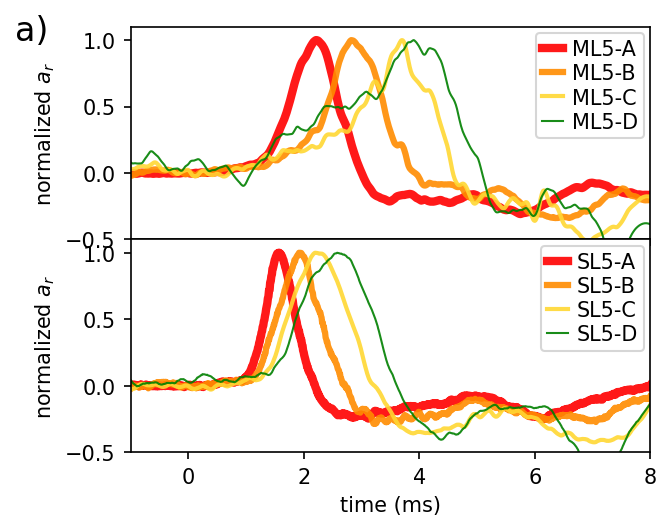

In [673]:
fig,axarr = plt.subplots(2,1,figsize=(4.5,3.5),\
            dpi=150,sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0,top=0.97, bottom=0.16, left=0.2,right=0.97)
axarr[1].set_xlabel('time (ms)')
axarr[1].set_ylabel(r'normalized $a_r$')
axarr[0].set_ylabel(r'normalized $a_r$')
axarr[0].set_ylim([-0.5,1.1])


t0 = ds_L5.tarr_d[ii_a]*1e3
aset = ds_L5.aset_r
a0 = mknice(np.squeeze(aset[ii_a,0]),3)
a1 = mknice(np.squeeze(aset[ii_a,1]),3)    
a2 = mknice(np.squeeze(aset[ii_a,2]),31)
a3 = mknice(np.squeeze(aset[ii_a,3]),51)
axarr[0].plot(t0,a0,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='ML5-A')
axarr[0].plot(t0,a1,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='ML5-B')
axarr[0].plot(t0,a2,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='ML5-C')
axarr[0].plot(t0,a3,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='ML5-D')

dz = 0
t0 = ds_SL5_2.tarr_d[Sii_a]*1e3
aset = ds_SL5_2.aset_r
a0 = mknice(np.squeeze(aset[Sii_a,0]),3)
a1 = mknice(np.squeeze(aset[Sii_a,1]),3)   
a2 = mknice(np.squeeze(aset[Sii_a,2]),31)
a3 = mknice(np.squeeze(aset[Sii_a,3]),31)
axarr[1].plot(t0,a0 - dz,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='SL5-A')
axarr[1].plot(t0,a1 - dz,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='SL5-B')
axarr[1].plot(t0,a2 - dz,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='SL5-C')
axarr[1].plot(t0,a3 - dz,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='SL5-D')


axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[0].set_xlim([-1,8])
axarr[0].text(-3,1.0, 'a)',fontsize=16)

plt.savefig(oroot+'ar_norm.png')

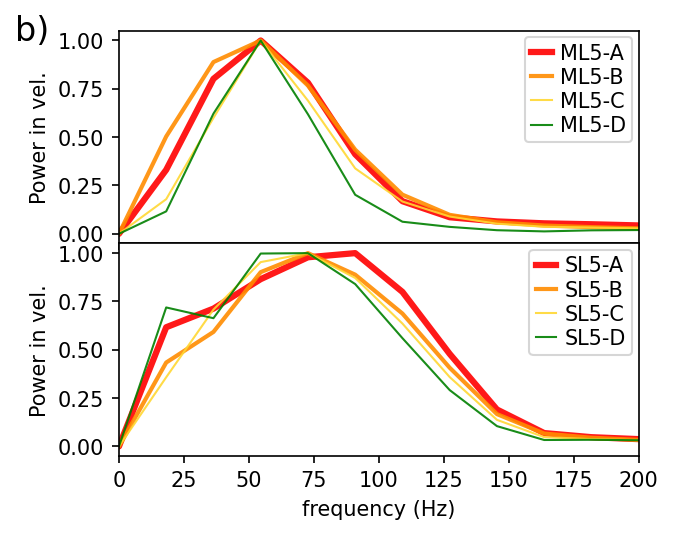

In [674]:
tleft = -0.02; tright=0.035;
ii_v = (ds_L5.tarr_d >= tleft) & (ds_L5.tarr_d < tright)
#ds_L5.aset_R[ii,1]
time_step = ds_L5.tarr_d[1] - ds_L5.tarr_d[0]
Stleft = tleft; Stright=tright;
#Stime_step = ds_SL5.tarr_d[1] - ds_SL5.tarr_d[0]
Sii_v = (ds_SL5_2.tarr_d >= Stleft) & (ds_SL5_2.tarr_d < Stright)

vffrac=0.7
vset = ds_L5.vset_r
freqs_L5_0,ps_L5_0  = ps_freq_frac(np.squeeze(vset[ii_v,0]),time_step,vffrac)
freqs_L5_1,ps_L5_1  = ps_freq_frac(np.squeeze(vset[ii_v,1]),time_step,vffrac)
freqs_L5_2,ps_L5_2  = ps_freq_frac(np.squeeze(vset[ii_v,2]),time_step,vffrac)
freqs_L5_3,ps_L5_3  = ps_freq_frac(np.squeeze(vset[ii_v,3]),time_step,vffrac)

vset = ds_SL5_2.vset_r
freqs_SL5_0,ps_SL5_0  = ps_freq_frac(np.squeeze(vset[Sii_v,0]),Stime_step,vffrac)
freqs_SL5_1,ps_SL5_1  = ps_freq_frac(np.squeeze(vset[Sii_v,1]),Stime_step,vffrac)
freqs_SL5_2,ps_SL5_2  = ps_freq_frac(np.squeeze(vset[Sii_v,2]),Stime_step,vffrac)
freqs_SL5_3,ps_SL5_3  = ps_freq_frac(np.squeeze(vset[Sii_v,3]),Stime_step,vffrac)

fig,axarr = plt.subplots(2,1,figsize=(4.5,3.5),\
            dpi=150,sharex=True,sharey=False)
plt.subplots_adjust(hspace=0,wspace=0,top=0.97, bottom=0.16, left=0.2,right=0.97)

axarr[0].set_xlim([0,200])
axarr[1].set_xlabel('frequency (Hz)')
axarr[0].set_ylabel('Power in vel.')
axarr[1].set_ylabel('Power in vel.')

axarr[0].plot(freqs_L5_0,ps_L5_0/max(ps_L5_0),'-',color=ch_colorlist[0],lw=3,alpha=0.9,label='ML5-A')
axarr[0].plot(freqs_L5_1,ps_L5_1/max(ps_L5_1),'-',color=ch_colorlist[1],lw=2,alpha=0.9,label='ML5-B')
axarr[0].plot(freqs_L5_2,ps_L5_2/max(ps_L5_2),'-',color=ch_colorlist[2],lw=1,alpha=0.9,label='ML5-C')
axarr[0].plot(freqs_L5_3,ps_L5_3/max(ps_L5_3),'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='ML5-D')

axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
dz = 0.0
axarr[1].plot(freqs_SL5_0,ps_SL5_0/max(ps_SL5_0) - dz,'-',color=ch_colorlist[0],lw=3,alpha=0.9,label='SL5-A')
axarr[1].plot(freqs_SL5_1,ps_SL5_1/max(ps_SL5_1) - dz,'-',color=ch_colorlist[1],lw=2,alpha=0.9,label='SL5-B')
axarr[1].plot(freqs_SL5_2,ps_SL5_2/max(ps_SL5_2) - dz,'-',color=ch_colorlist[2],lw=1,alpha=0.9,label='SL5-C')
axarr[1].plot(freqs_SL5_3,ps_SL5_3/max(ps_SL5_3) - dz,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='SL5-D')


axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[0].text(-40,1.0, 'b)',fontsize=16)

plt.savefig(oroot+'power_v.png') # 


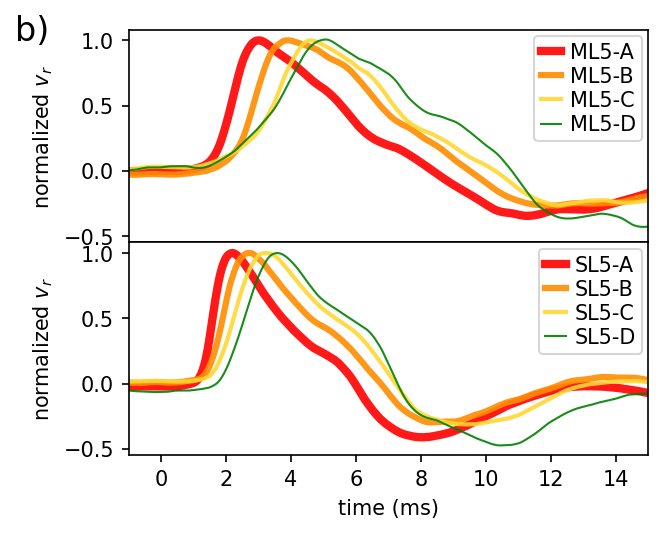

In [679]:
fig,axarr = plt.subplots(2,1,figsize=(4.5,3.5),\
            dpi=150,sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0,top=0.97, bottom=0.16, left=0.2,right=0.97)
axarr[1].set_ylabel(r'normalized $v_r$')
axarr[0].set_ylabel(r'normalized $v_r$')

t0 = ds_L5.tarr_d[ii_v]*1e3
vset = ds_L5.vset_r
v0 = mknice(np.squeeze(vset[ii_v,0]),3)
v1 = mknice(np.squeeze(vset[ii_v,1]),3)    
v2 = mknice(np.squeeze(vset[ii_v,2]),51)
v3 = mknice(np.squeeze(vset[ii_v,3]),61)

axarr[0].plot(t0,v0,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='ML5-A')
axarr[0].plot(t0,v1,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='ML5-B')
axarr[0].plot(t0,v2,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='ML5-C')
axarr[0].plot(t0,(v3-0.05)*1.06,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='ML5-D')

t0 = ds_SL5_2.tarr_d[Sii_v]*1e3
vset = ds_SL5_2.vset_r
v0 = mknice(np.squeeze(vset[Sii_v,0]),3)
v1 = mknice(np.squeeze(vset[Sii_v,1]),3)    
v2 = mknice(np.squeeze(vset[Sii_v,2]),31)
v3 = mknice(np.squeeze(vset[Sii_v,3]),31)

dz = 0
axarr[1].plot(t0,v0 - dz,'-',color=ch_colorlist[0],lw=4,alpha=0.9,label='SL5-A')
axarr[1].plot(t0,v1 - dz,'-',color=ch_colorlist[1],lw=3,alpha=0.9,label='SL5-B')
axarr[1].plot(t0,v2 - dz,'-',color=ch_colorlist[2],lw=2,alpha=0.9,label='SL5-C')
axarr[1].plot(t0,v3 - dz,'-',color=ch_colorlist[3],lw=1,alpha=0.9,label='SL5-D')
axarr[1].set_xlabel('time (ms)')
#axarr[1].set_xlim([-1,15])
axarr[1].set_xlim([-1,15])

axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)
axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4)

axarr[0].text(-4.5,1.0, 'b)',fontsize=16)
plt.savefig(oroot+'vr_norm.png')

In [30]:
# peak properties 
print('peak props MR5 ML5 SL5')
print('apk {:.1f} & {:.1f} & {:.1f} m2/s'.format(ms_R5.a_pk[0],ms_L5.a_pk[0],ms_SL5_2.a_pk[0]))
print('vpk {:.3f} & {:.3f} & {:.3f} m/s'.format(ms_R5.v_pk[0],ms_L5.v_pk[0],ms_SL5_2.v_pk[0]))
print('afwhm {:.2f} & {:.2f} & {:.2f} ms'.format(ms_R5.a_fwhm[0]*1e3,ms_L5.a_fwhm[0]*1e3,ms_SL5_2.a_fwhm[0]*1e3))
print('vfwhm {:.2f} & {:.2f} & {:.2f} ms'.format(ms_R5.v_fwhm[0]*1e3,ms_L5.v_fwhm[0]*1e3,ms_SL5_2.v_fwhm[0]*1e3))
W_a_MR5 = ms_R5.a_fwhm[0]/ms_R5.a_tprop[0]
W_a_ML5 = ms_L5.a_fwhm[0]/ms_L5.a_tprop[0]
W_a_SL5 = ms_SL5_2.a_fwhm[0]/ms_SL5_2.a_tprop[0]
W_v_MR5 = ms_R5.v_fwhm[0]/ms_R5.v_tprop[0]
W_v_ML5 = ms_L5.v_fwhm[0]/ms_L5.v_tprop[0]
W_v_SL5 = ms_SL5_2.v_fwhm[0]/ms_SL5_2.v_tprop[0]
print('Wa {:.2f} & {:.2f} & {:.2f}'.format(W_a_MR5,W_a_ML5,W_a_SL5))
print('Wv {:.2f} & {:.2f} & {:.2f}'.format(W_v_MR5,W_v_ML5,W_v_SL5))

peak props MR5 ML5 SL5
apk 17.7 & 51.5 & 41.3 m2/s
vpk 0.021 & 0.050 & 0.025 m/s
afwhm 1.12 & 0.91 & 0.58 ms
vfwhm 4.28 & 3.41 & 2.21 ms
Wa 0.49 & 0.41 & 0.37
Wv 1.38 & 1.14 & 1.01


In [31]:
P_MR5 = ms_R5.v_pk[0] * rho_s *v_p
P_ML5 = ms_L5.v_pk[0] * rho_s *v_p
P_SL5 = ms_SL5_2.v_pk[0] * Srho_s *v_p
print('P_peak (Pa) {:.0f} & {:.0f} & {:.0f} '.format(P_MR5,P_ML5,P_SL5))
print('P_peak/E_g  {:.1e} & {:.1e} & {:.1e}'.format(P_MR5/E_g,P_ML5/E_g,P_SL5/SE_g))
g=9.8
H_MR5 = P_MR5/(rho_s*g)
H_ML5 = P_ML5/(rho_s*g)
H_SL5 = P_SL5/(Srho_s*g)
print('H_p (cm)    {:.0f} & {:.0f} & {:.0f} '.format(H_MR5*1e2,H_ML5*1e2,H_SL5*1e2))

P_peak (Pa) 846 & 2052 & 2086 
P_peak/E_g  8.5e-06 & 2.1e-05 & 2.1e-07
H_p (cm)    12 & 28 & 14 


In [32]:
print('M (r/d) = {:.2f} sqrt(r/d)={:.2f}'.format(ds_L5.rcoords[0]/3e-3,       np.sqrt(ds_L5.rcoords[0]/3e-3)))
print('S (r/d) = {:.2f} sqrt(r/d)={:.2f}'.format(ds_SL5_2.rcoords[0]/0.5e-3, np.sqrt(ds_SL5_2.rcoords[0]/0.5e-3)))

M (r/d) = 23.57 sqrt(r/d)=4.85
S (r/d) = 141.42 sqrt(r/d)=11.89


In [33]:
print('r  (cm)      {:.2f} {:.2f} {:.2f}'.format(ds_R5.rcoords[0]*100,ds_L5.rcoords[0]*100,ds_SL5.rcoords[0]*100))
print('r/R_crater   {:.2f} {:.2f} {:.2f}'.format(ds_R5.rcoords[0]/R_crater,\
                                               ds_L5.rcoords[0]/R_crater,ds_SL5_2.rcoords[0]/SR_crater))
print('EJ (mJ)      {:.2f} & {:.2f} & {:.2f} '.format(EJ_R5[0]*1e3, EJ_L5[0]*1e3, EJ_SL5_2[0]*1e3) )
print('seism eff(%) {:.1f} & {:.1f} & {:.1f} '.format(EJ_R5[0]/K_impact*1e2, EJ_L5[0]/K_impact*1e2,\
                                             EJ_SL5_2[0]/SK_impact*1e2) )


r  (cm)      6.80 7.07 7.07
r/R_crater   1.24 1.29 1.89
EJ (mJ)      2.17 & 9.04 & 4.72 
seism eff(%) 0.8 & 3.3 & 1.5 


$$v_{pk}(R_{rc}) = B_{\rm eff}  \frac{m_p v_{imp}}{2 \pi \rho_2 R_{cr}^3} $$


$$v_{pk}(R_{rc}) = \frac{b_{\rm eff} C_D}{2} \frac{R_p^2}{R_{cr}^2} \frac{v_{imp}^2}{v_P} $$

$$a_{pk}(R_{rc}) = \frac{b_{\rm eff} C_D}{2} \frac{R_p^2}{R_{cr}^2} \frac{v_{imp}^2}{v_P} \frac{v_P}{R_{cr}}$$

$$ a_{pk}(R_{rc}) = \frac{ v_{pk}(R_{cr})}{\Delta t_v (R_{cr}) }  \sim v_{pk}(R_{cr}) \frac{v_P}{R_{cr}}$$


$$ a_{pk}(R_{rc}) =  \sqrt{  \frac{k_{seis} K_{imp} }{2 \pi \rho_s R_{cr}^3}} \frac{v_P}{R_{cr}}$$


In [278]:
# read in data from Matsue+20 and  Yasui+15
#run       mp    vimp   R_cr  xcm   tris tmax  gmax  Thalf rhop Vp 
#          g     m/s    cm    cm    ms   ms    m/s2  ms    kg/m3 m/s
junk = np.loadtxt('yasui_matsue.dat',comments='#')
dat_run   = junk[:,0]
dat_mp    = junk[:,1]*1e-3  # in g to kg
dat_vimp  = junk[:,2]  # in m/s
dat_Rcr   = junk[:,3]*1e-2  # in cm to m
dat_xcm   = junk[:,4]*1e-2 # cm to m
dat_tris  = junk[:,5]
dat_tmax  = junk[:,6]
dat_gmax  = junk[:,7]  # in m/s^2
dat_Thalf = junk[:,8]*1e-3 # ms to s
dat_rhop  = junk[:,9]  # kg/m^3
dat_Vp    = junk[:,10] # in m/s
dat_rhos  = junk[:,11] # kg/m^3
dat_Rp    = junk[:,12]*1e-3 # mm to m
#T_seis = dat_Rcr/dat_Vp   # in ms
x_over_R = dat_xcm/dat_Rcr  # unitless
#dat_vpk = dat_gmax*dat_Thalf  # to m/s
#dat_vpk2 = dat_gmax*dat_Rcr/dat_Vp # to m/s
dat_m_Cr = 2*np.pi*dat_rhos*dat_Rcr**3  # like a crater mass in kg
dat_momentum = dat_mp * dat_vimp  # in kg m/s
dat_Kimp = 0.5*dat_mp* dat_vimp **2  # kinetic energy kms


#Beta_YM = m_Cr*dat_vpk/momentum 
# momentum
dat_BB_par = 4
a_pk_YM = (dat_BB_par*dat_momentum/dat_m_Cr) * dat_Vp/(dat_Rcr)
print('1', np.mean(a_pk_YM))
aratio = dat_gmax/a_pk_YM 

# energy 
dat_kseis=1e-3
a_pk_YM3 = np.sqrt(dat_kseis*dat_Kimp/dat_m_Cr) * dat_Vp/dat_Rcr
aratio3 = dat_gmax/a_pk_YM3 
print('3', np.mean(a_pk_YM3))

1 157.9637518251445
2 302.6286170167289
1.9158105167805772
3 162.0404718738538


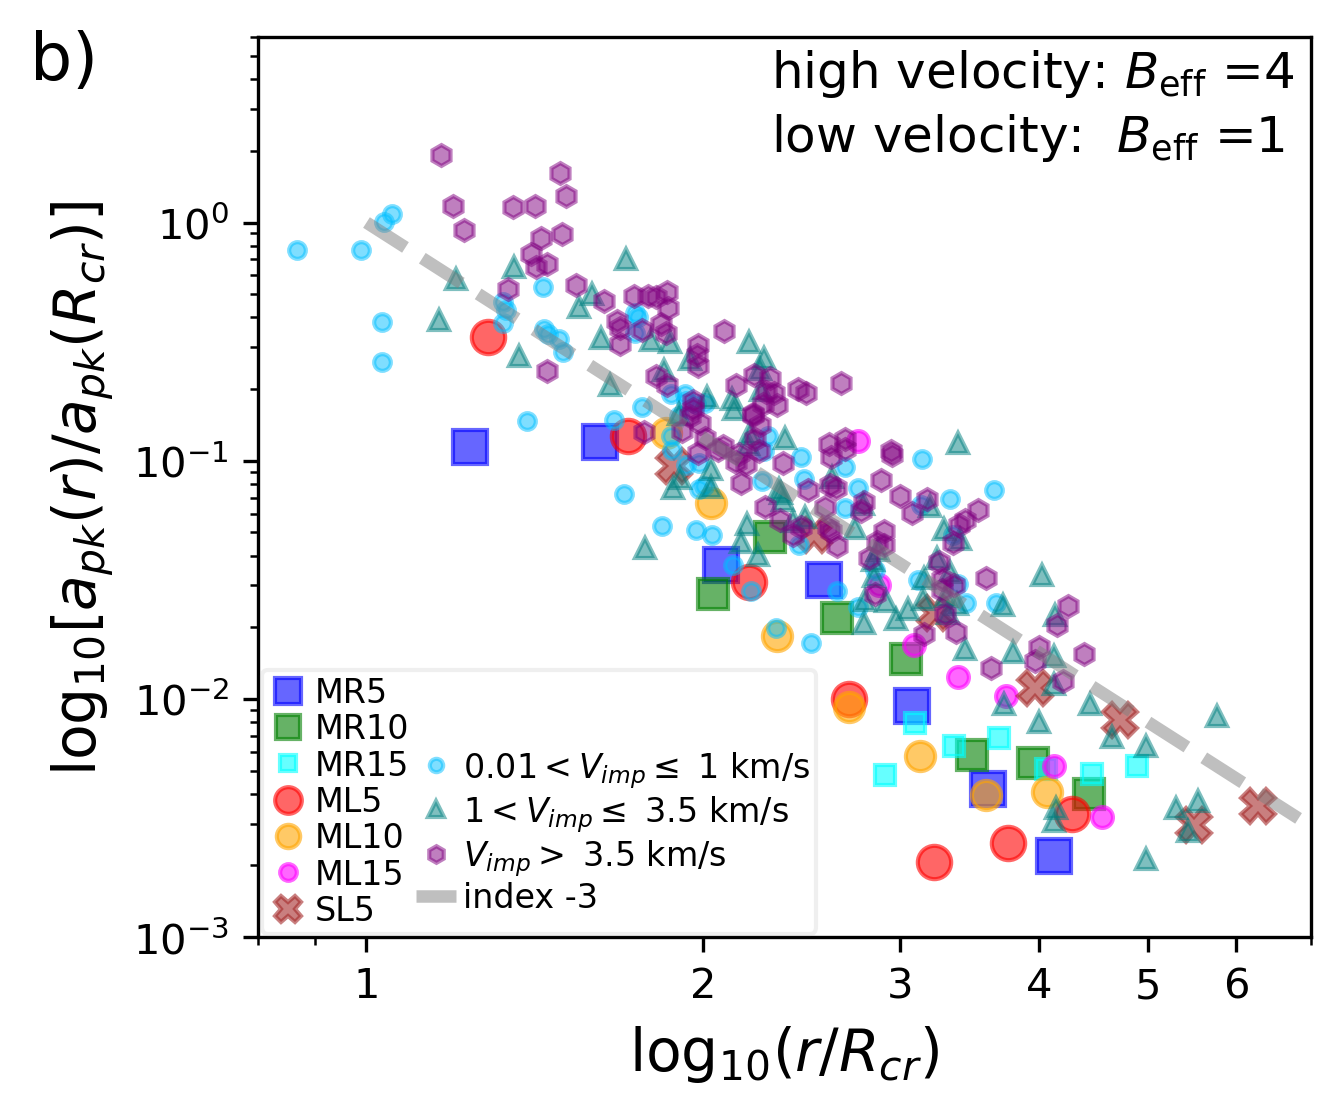

In [277]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.0),dpi=300)
plt.subplots_adjust(hspace=0,wspace=0,top=0.95, bottom=0.2, left=0.2,right=0.98)
#ax.plot(x_over_R, dat_gmax/a_pk_YM,'.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.8,7])
ax.set_ylim([0.0010,6])

momentum  = m_p * v_impact;   m_Cr = 2*np.pi* rho_s* (R_crater)**3 
Smomentum = Sm_p*Sv_impact;  Sm_Cr = 2*np.pi*Srho_s*(SR_crater)**3 
BB_par=1; Sbeta_par = BB_par
a_pk_Rs  = (BB_par *momentum/ m_Cr)  * v_p/ R_crater
Sa_pk_Rs = (BB_par*Smomentum/Sm_Cr) * v_p/SR_crater

a_R5  = ms_R5.a_pk /a_pk_Rs
a_R10 = ms_R10.a_pk/a_pk_Rs
a_R15 = ms_R15.a_pk/a_pk_Rs
a_L5  = ms_L5.a_pk /a_pk_Rs
a_L10 = ms_L10.a_pk/a_pk_Rs
a_L15 = ms_L15.a_pk/a_pk_Rs
a_SL5    = ms_SL5.a_pk  /Sa_pk_Rs
a_SL5_2  = ms_SL5_2.a_pk/Sa_pk_Rs

k=0;  ax.plot(ds_R5.rcoords /R_crater ,a_R5 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords/R_crater,a_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords/R_crater,a_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords /R_crater ,a_L5 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords/R_crater,a_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords/R_crater,a_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,a_SL5 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords/SR_crater,a_SL5_2 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

#ax.plot([0],[0],'.',color='white',label=' ')
ax.plot([0],[0],'.',color='white',label=' ')
ax.plot([0],[0],'.',color='white',label=' ')

#ii = (dat_vimp<=10)  
#Dii = (dat_rhop > 2000)
Dii = True
xii = x_over_R > 0.8
#ax.plot(x_over_R[ii], aratio[ii],'rs', ms=5,alpha=0.5, label=r'$V_{imp} \leq$ 10 m/s ' )
ii = (dat_vimp>10)  & (dat_vimp<=1000)  & Dii & xii
ax.plot(x_over_R[ii], aratio[ii],'o',ms=4,color='deepskyblue',alpha=0.5,label=r'$0.01 < V_{imp}\leq$ 1 km/s')
ii = (dat_vimp>1000) &  (dat_vimp<=3500) & Dii
ax.plot(x_over_R[ii], aratio[ii],'^', ms=5, color='teal',alpha=0.5,label=r'$1 < V_{imp}\leq$ 3.5 km/s' )
ii = (dat_vimp>3500)  & Dii
ax.plot(x_over_R[ii], aratio[ii],'h', ms=5,color='purple',alpha=0.5, label=r'$V_{imp} >$ 3.5 km/s  ' )


#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

xarr = np.linspace(1,7,100)
yarr = xarr**-3.0
ax.plot(xarr,yarr,'--',color='grey',alpha=0.5,lw=3,label=r'index -3')
#ax.plot(xarr,yarr,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=1')
#ax.plot(xarr,yarr*4,'--',color='brown',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=4')
#ax.plot(xarr,yarr*0.5,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=0.5')
#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

ax.set_xlabel(r'log$_{10} (r/R_{cr})$',fontsize=14)
ax.set_ylabel(r'log$_{10} [a_{pk}(r)/a_{pk}(R_{cr})]$',fontsize=14)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['1','2','3','4','5','6'])

plt.legend(borderpad=0.2,labelspacing=0.1,handlelength=1.2,handletextpad=0.2,borderaxespad=0.1,\
           ncol=2,columnspacing=0.2,loc='lower left',markerscale=0.8,fontsize=8,framealpha=0.3)

xleft=2.3
dat_blabel = r'high velocity: $B_\mathrm{eff}$ ='  + '{:.0f}'.format(dat_BB_par)
ax.text(xleft,3.7,dat_blabel,fontsize=12)
blabel = r'low velocity:  $B_\mathrm{eff}$ ='  + '{:.0f}'.format(BB_par)
ax.text(xleft,2,blabel,fontsize=12)
ax.text(0.5,4,'b)',fontsize=16)

plt.savefig('YM_momentum.png')



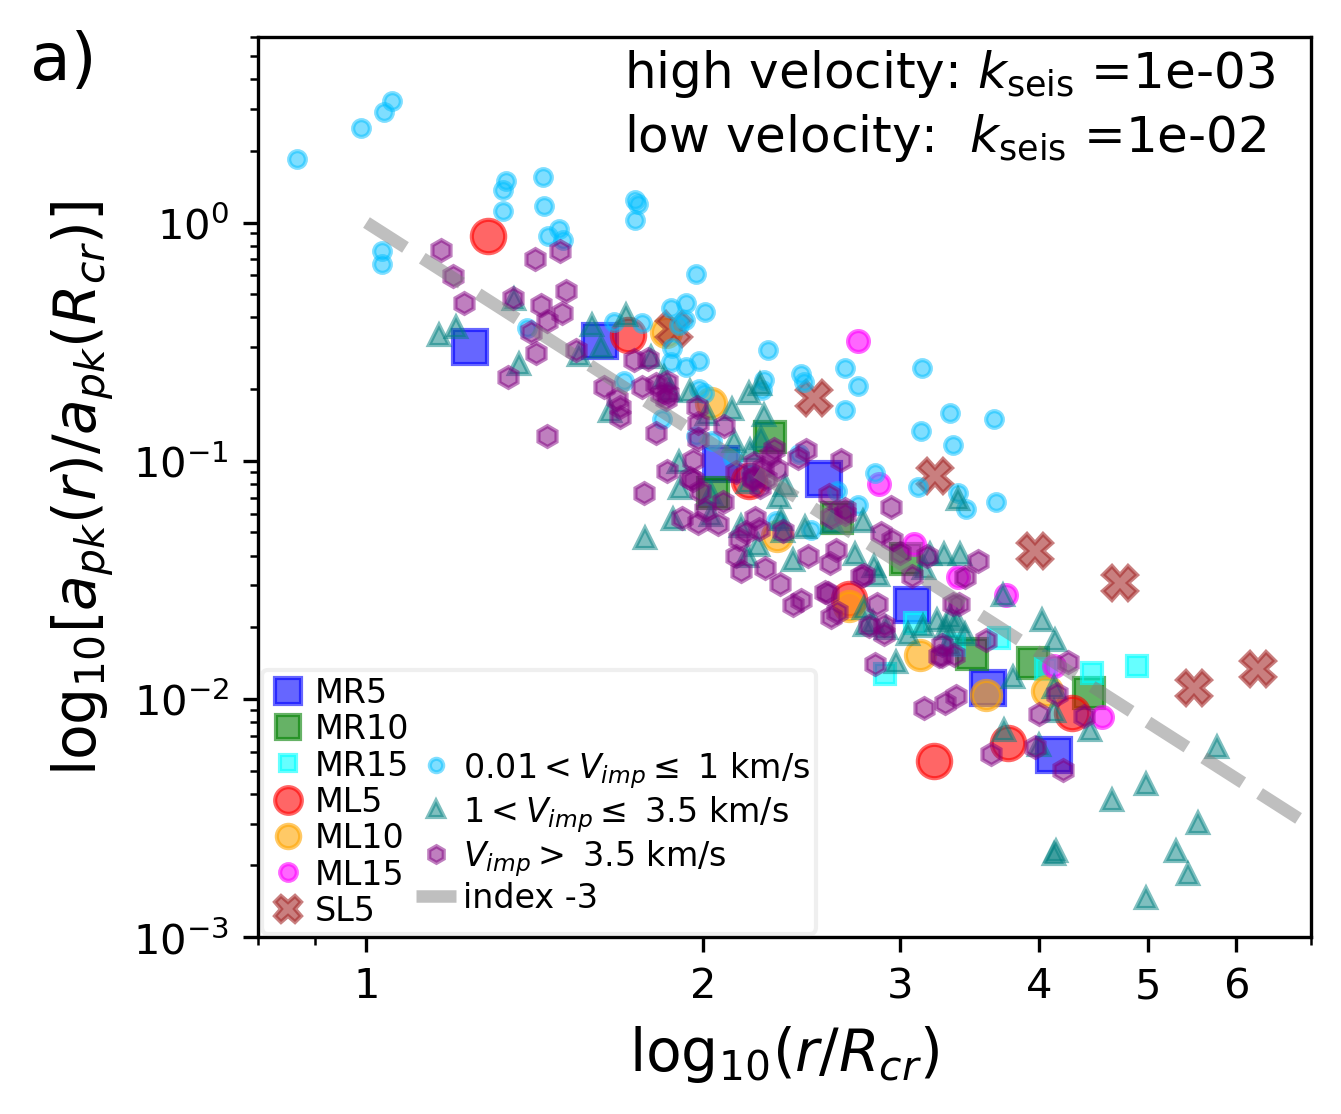

In [276]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.0),dpi=300)
plt.subplots_adjust(hspace=0,wspace=0,top=0.95, bottom=0.2, left=0.2,right=0.98)
#ax.plot(x_over_R, dat_gmax/a_pk_YM,'.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.8,7])
ax.set_ylim([0.0010,6])




momentum  = m_p * v_impact;   m_Cr = 2*np.pi* rho_s* (R_crater)**3 
Smomentum = Sm_p*Sv_impact;  Sm_Cr = 2*np.pi*Srho_s*(SR_crater)**3 
kseis=1e-2; 
Skseis = kseis
a_pk_Rs  = np.sqrt(kseis  *K_impact/ m_Cr) * v_p/ R_crater
Sa_pk_Rs = np.sqrt(Skseis*SK_impact/Sm_Cr) * v_p/SR_crater

a_R5  = ms_R5.a_pk /a_pk_Rs
a_R10 = ms_R10.a_pk/a_pk_Rs
a_R15 = ms_R15.a_pk/a_pk_Rs
a_L5  = ms_L5.a_pk /a_pk_Rs
a_L10 = ms_L10.a_pk/a_pk_Rs
a_L15 = ms_L15.a_pk/a_pk_Rs
a_SL5    = ms_SL5.a_pk  /Sa_pk_Rs
a_SL5_2  = ms_SL5_2.a_pk/Sa_pk_Rs

k=0;  ax.plot(ds_R5.rcoords /R_crater ,a_R5 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords/R_crater,a_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords/R_crater,a_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords /R_crater ,a_L5 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords/R_crater,a_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords/R_crater,a_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,a_SL5 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords/SR_crater,a_SL5_2 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ')
ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

#ii = (dat_vimp<=10)  
#Dii = (dat_rhop > 2000)
Dii = True
xii = x_over_R > 0.8
#ax.plot(x_over_R[ii], aratio[ii],'rs', ms=5,alpha=0.5, label=r'$V_{imp} \leq$ 10 m/s ' )
ii = (dat_vimp>10)  & (dat_vimp<=1000)  & Dii & xii
ax.plot(x_over_R[ii], aratio3[ii],'o',ms=4,color='deepskyblue',alpha=0.5,label=r'$0.01 < V_{imp}\leq$ 1 km/s')
ii = (dat_vimp>1000) &  (dat_vimp<=3500) & Dii
ax.plot(x_over_R[ii], aratio3[ii],'^', ms=5, color='teal',alpha=0.5,label=r'$1 < V_{imp}\leq$ 3.5 km/s' )
ii = (dat_vimp>3500)  & Dii
ax.plot(x_over_R[ii], aratio3[ii],'h', ms=5,color='purple',alpha=0.5, label=r'$V_{imp} >$ 3.5 km/s  ' )


#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

xarr = np.linspace(1,7,100)
yarr = xarr**-3.0
ax.plot(xarr,yarr,'--',color='grey',alpha=0.5,lw=3,label=r'index -3')
#ax.plot(xarr,yarr,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=1')
#ax.plot(xarr,yarr*4,'--',color='brown',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=4')
#ax.plot(xarr,yarr*0.5,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=0.5')

ax.set_xlabel(r'log$_{10} (r/R_{cr})$',fontsize=14)
ax.set_ylabel(r'log$_{10} [a_{pk}(r)/a_{pk}(R_{cr})]$',fontsize=14)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['1','2','3','4','5','6'])


plt.legend(borderpad=0.2,labelspacing=0.1,handlelength=1.2,handletextpad=0.2,borderaxespad=0.1,\
           ncol=2,columnspacing=0.2,loc='lower left',markerscale=0.8,fontsize=8,framealpha=0.3)

xleft=1.7
blabel = r'low velocity:  $k_\mathrm{seis}$ ='  + '{:.0e}'.format(kseis)
ax.text(xleft,2,blabel,fontsize=12)
dat_blabel = r'high velocity: $k_\mathrm{seis}$ ='  + '{:.0e}'.format(dat_kseis)
ax.text(xleft,3.7,dat_blabel,fontsize=12)
ax.text(0.5,4,'a)',fontsize=16)

plt.savefig('YM_energy.png')



Text(1.6, 4.2, 'high velocity: $b_\\mathrm{eff}C_D$ =0.005')

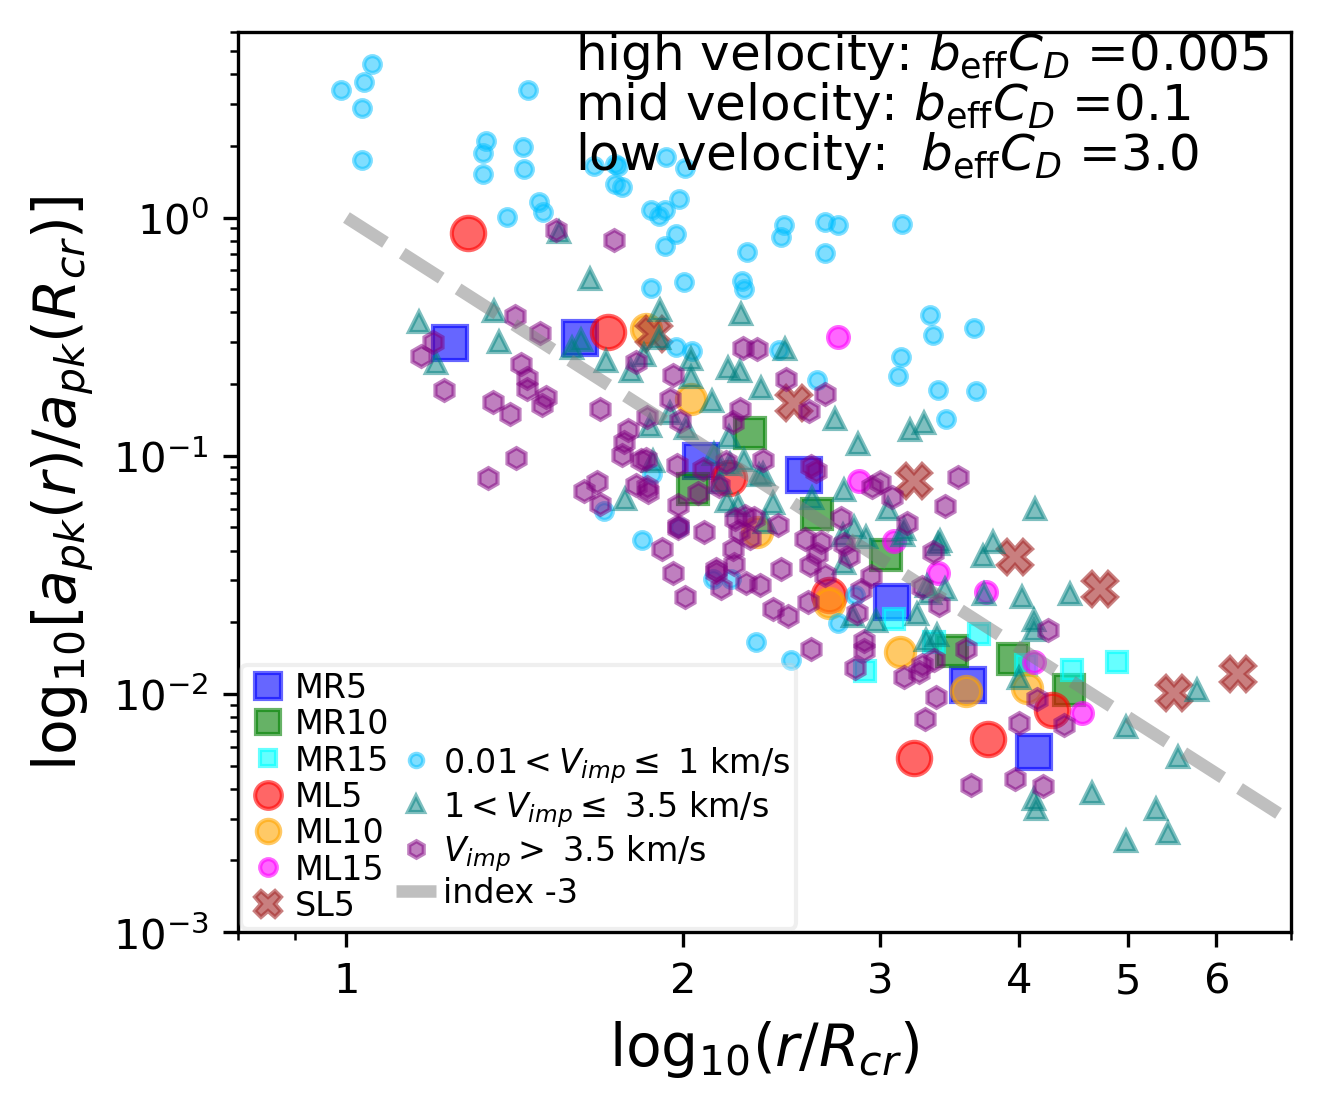

In [450]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.0),dpi=300)
plt.subplots_adjust(hspace=0,wspace=0,top=0.95, bottom=0.2, left=0.2,right=0.98)
#ax.plot(x_over_R, dat_gmax/a_pk_YM,'.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.8,7])
ax.set_ylim([0.0010,6])

momentum  = m_p * v_impact;   m_Cr = 2*np.pi* rho_s* (R_crater)**3 
Smomentum = Sm_p*Sv_impact;  Sm_Cr = 2*np.pi*Srho_s*(SR_crater)**3 
beff=3;  Sbeff=beff
a_pk_Rs  = 0.5*  beff * R_p**2    *v_impact**2  / R_crater**3
Sa_pk_Rs = 0.5* Sbeff * SR_p**2   *Sv_impact**2 / SR_crater**3

a_R5  = ms_R5.a_pk /a_pk_Rs
a_R10 = ms_R10.a_pk/a_pk_Rs
a_R15 = ms_R15.a_pk/a_pk_Rs
a_L5  = ms_L5.a_pk /a_pk_Rs
a_L10 = ms_L10.a_pk/a_pk_Rs
a_L15 = ms_L15.a_pk/a_pk_Rs
a_SL5    = ms_SL5.a_pk  /Sa_pk_Rs
a_SL5_2  = ms_SL5_2.a_pk/Sa_pk_Rs

k=0;  ax.plot(ds_R5.rcoords /R_crater ,a_R5 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords/R_crater,a_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords/R_crater,a_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords /R_crater ,a_L5 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords/R_crater,a_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords/R_crater,a_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,a_SL5 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords/SR_crater,a_SL5_2 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ')
ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

# Drag!
dat_bb_par_mid = 0.1; 
a_pk_YM2_mid = 0.5*dat_bb_par_mid  * dat_Rp**2 * dat_vimp**2 / dat_Rcr**3 
dat_bb_par_high = 0.005; 
a_pk_YM2_high = 0.5*dat_bb_par_high  * dat_Rp**2 * dat_vimp**2 / dat_Rcr**3 
#print('2', np.mean(a_pk_YM2)) # is really way too big
#print(np.mean(a_pk_YM2)/np.mean(a_pk_YM))
aratio_mid = dat_gmax/a_pk_YM2_mid 
aratio_high = dat_gmax/a_pk_YM2_high   

#ii = (dat_vimp<=10)  
#Dii = (dat_rhop > 2000)
Dii = True
xii = x_over_R > 0.8
#ax.plot(x_over_R[ii], aratio[ii],'rs', ms=5,alpha=0.5, label=r'$V_{imp} \leq$ 10 m/s ' )
ii = (dat_vimp>10)  & (dat_vimp<=1000)  & Dii & xii
ax.plot(x_over_R[ii], aratio_mid[ii],'o',ms=4,color='deepskyblue',alpha=0.5,label=r'$0.01 < V_{imp}\leq$ 1 km/s')
ii = (dat_vimp>1000) &  (dat_vimp<=3500) & Dii
ax.plot(x_over_R[ii], aratio_high[ii],'^', ms=5, color='teal',alpha=0.5,label=r'$1 < V_{imp}\leq$ 3.5 km/s' )
ii = (dat_vimp>3500)  & Dii
ax.plot(x_over_R[ii], aratio_high[ii],'h', ms=5,color='purple',alpha=0.5, label=r'$V_{imp} >$ 3.5 km/s  ' )


#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')
#ax.plot([0],[0],'.',color='white',label=' ')

xarr = np.linspace(1,7,100)
yarr = xarr**-3.0
ax.plot(xarr,yarr,'--',color='grey',alpha=0.5,lw=3,label=r'index -3')
#ax.plot(xarr,yarr,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=1')
#ax.plot(xarr,yarr*4,'--',color='brown',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=4')
#ax.plot(xarr,yarr*0.5,':',color='grey',alpha=0.5,lw=2,label=r'index -3, $B_\mathrm{eff}$=0.5')

ax.set_xlabel(r'log$_{10} (r/R_{cr})$',fontsize=14)
ax.set_ylabel(r'log$_{10} [a_{pk}(r)/a_{pk}(R_{cr})]$',fontsize=14)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['1','2','3','4','5','6'])


plt.legend(borderpad=0.2,labelspacing=0.1,handlelength=1.2,handletextpad=0.2,borderaxespad=0.1,\
           ncol=2,columnspacing=0.2,loc='lower left',markerscale=0.8,fontsize=8,framealpha=0.3)

xleft=1.6
blabel = r'low velocity:  $b_\mathrm{eff}C_D$ ='  + '{:.1f}'.format(beff)
ax.text(xleft,1.6,blabel,fontsize=12)
dat_blabel_mid = r'mid velocity: $b_\mathrm{eff}C_D$ ='  + '{:.1f}'.format(dat_bb_par_mid)
dat_blabel_high = r'high velocity: $b_\mathrm{eff}C_D$ ='  + '{:.3f}'.format(dat_bb_par_high)
ax.text(xleft,2.6,dat_blabel_mid,fontsize=12)
ax.text(xleft,4.2,dat_blabel_high,fontsize=12)
#ax.text(0.5,4,'a)',fontsize=16)

#plt.savefig('YM_CD.png')   #not used



In [ ]:
# below not used in paper

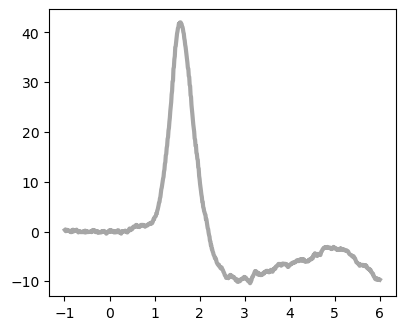

In [36]:
fig,ax = plt.subplots(1,1,figsize=(4.5,3.5),\
            dpi=100,sharex=True,sharey=False)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.16, left=0.2,right=0.97)

tleft = -0.001; tright=0.006
S2ii = (ds_SL5_2.tarr_d >= tleft) & (ds_SL5_2.tarr_d < tright)
t3=ds_SL5_2.tarr_d[S2ii]*1e3;
d3=np.squeeze(ds_SL5_2.aset_r[S2ii,0])
ax.plot(t3,d3,'-',color='grey',lw=3,alpha=0.7,label='SL5-A')

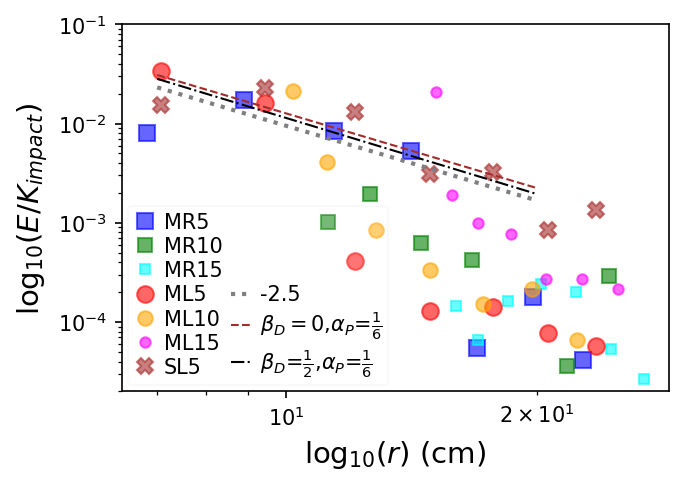

In [36]:
fig,ax = plt.subplots(1,1,figsize=(5.0,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.26, left=0.25,right=0.98)

xvec = np.linspace(7,20,100)
rvec_norm1 = xvec*1e-2/R_crater
rvec_norm2 = xvec*1e-2/SR_crater

xvec = np.linspace(7,20,100)
alpha1=-2.5; yvec1 = (xvec)**alpha1 *3
alabel1 = '{:.1f}'.format(alpha1)
#alpha2=-3.5;  yvec2 = (xvec/5)**alpha2 *.01
#alabel2 = '{:.1f}'.format(alpha2)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,EJ_R5/K_impact ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,EJ_R10/K_impact,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,EJ_R15/K_impact,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,EJ_L5/K_impact ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,EJ_L10/K_impact,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,EJ_L15/K_impact,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,EJ_SL5/SK_impact,'h',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,EJ_SL5_2/SK_impact,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[0],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec1,':',color='grey',label=alabel1,lw=2)
#ax.plot(xvec,yvec2,':',color='brown',label=alabel2,lw=1)

yvec1 = xvec**gamma_EJ *4
yvec2 = xvec**gamma_EJ2 *4
ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)

ax.set_ylabel(r'log$_{10} (E/K_{impact})$',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.00002,0.1])

#vlab = r'{:.0f} m/s'.format(v_p)
#ax.plot(xvec*100,tvec*1e3,':',label=vlab,color='grey')


plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.4,framealpha=0.1)
plt.savefig(oroot+'EJ.png') # not used

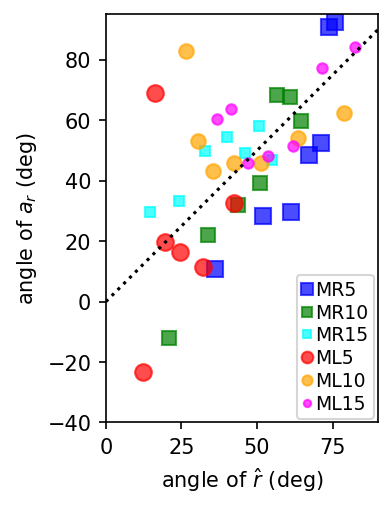

In [79]:
fig,ax = plt.subplots(1,1,figsize=(3.7,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.18,left=0.17,right=0.99)
mslist = [8,7,5,8,7,5,8,7,5]
mstring = ['s','s','s','o','o','o']
fac = -180/np.pi
aset=0.7
theta_Rz = np.arctan2(ds_R5.zcoords,ds_R5.Rcoords)*fac
k=0; ax.plot(theta_Rz,ms_R5.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)
theta_Rz = np.arctan2(ds_R10.zcoords,ds_R10.Rcoords)*fac
k+=1; ax.plot(theta_Rz,ms_R10.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)
theta_Rz = np.arctan2(ds_R15.zcoords,ds_R15.Rcoords)*fac
k+=1; ax.plot(theta_Rz,ms_R15.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)
theta_Rz = np.arctan2(ds_L5.zcoords,ds_L5.Rcoords)*fac
k+=1; ax.plot(theta_Rz,ms_L5.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)
theta_Rz = np.arctan2(ds_L10.zcoords,ds_L10.Rcoords)*fac
k+=1; ax.plot(theta_Rz,ms_L10.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)
theta_Rz = np.arctan2(ds_L15.zcoords,ds_L15.Rcoords)*fac
k+=1; ax.plot(theta_Rz,ms_L15.a_theta*fac, mstring[k],color=colorlist[k],label=mlabellist[k],ms=mslist[k],alpha=aset)



ax.set_xlim([0,90])
ax.set_ylim([-40,95])
ax.plot([0,90],[0,90],':',color='black')
ax.set_ylabel(r'angle of $a_r$ (deg)')
ax.set_xlabel(r'angle of $\hat r$ (deg)')
ax.set_aspect('equal')
plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=0.5,handletextpad=0.2,borderaxespad=0.2,\
           ncol=1,columnspacing=0.3,loc='lower right',markerscale=0.7,fontsize=9)
plt.savefig(oroot+'theta_comp.png')

In [313]:
print('R_p/v_impact {:.2f} {:.2f} ms'.format(R_p/v_impact*1e3,SR_p/Sv_impact*1e3))

R_p/v_impact 4.11 2.97 ms


In [552]:
print('r  {:.1f} {:.1f} {:.1f} cm '.format(ds_R5.rcoords[0]*1e2,ds_L5.rcoords[0]*1e2,ds_SL5_2.rcoords[0]*1e2))
print('r/R_p {:.2f} {:.2f} '.format(ds_L5.rcoords[0]/R_p,ds_SL5_2.rcoords[0]/SR_p ))
print('sqrt(r/R_p) {:.2f} {:.2f} '.format(np.sqrt(ds_L5.rcoords[0]/R_p),np.sqrt(ds_SL5_2.rcoords[0]/SR_p )))

r  6.8 7.4 7.4 cm 
r/R_p 4.06 5.27 
sqrt(r/R_p) 2.02 2.30 


In [317]:
armax = 0.5*v_impact**3/(v_p*R_p)
armax2 = 0.5*Sv_impact**3/(v_p*SR_p)
print('{:.2f} {:.2f} m/s2'.format(armax,armax2))

48.13 75.89 m/s2


7.142857142857142

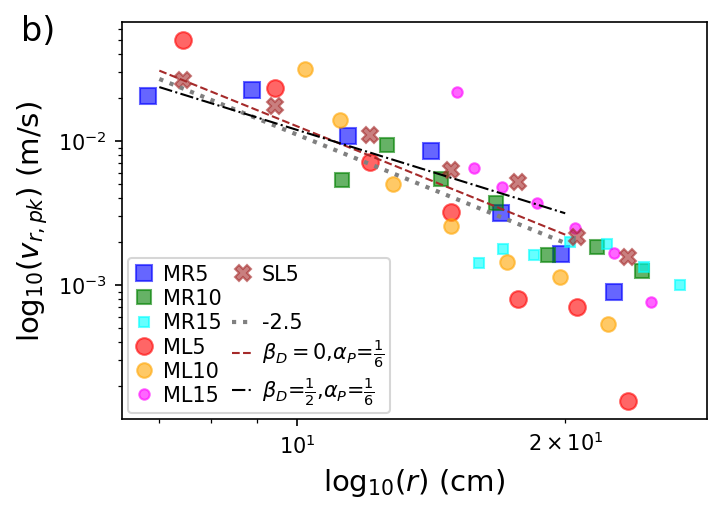

In [133]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)
#colorlist = ['blue','green','cyan','red','orange']
v_R5  = ms_R5.v_pk
v_R10 = ms_R10.v_pk
v_R15 = ms_R15.v_pk
v_L5  = ms_L5.v_pk
v_L10 = ms_L10.v_pk
v_L15 = ms_L15.v_pk
v_SL5  = ms_SL5.v_pk
v_SL5_2  = ms_SL5_2.v_pk

xvec = np.linspace(7,20,100)
alpha1=-2.5
yvec1 = (xvec)**alpha1 *3.5
alabel1 = '{:.1f}'.format(alpha1)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,v_R5, 's',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,v_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,v_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,v_L5, 'o',label=mlabellist[k] ,ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,v_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,v_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2 ,v_SL5,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2 ,v_SL5_2,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ')
ax.plot(xvec,yvec1,':',color='grey',label=alabel1,lw=2)

yvec1 = xvec**gamma_vpk *4
yvec2 = xvec**gamma_vpk2 *1
ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)

ax.set_ylabel(r'log$_{10}(v_{r,pk})$ (m/s)',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)

#avec = (xvec/v_p)
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5)
ax.text(4.9,0.05,'b)',fontsize=16)
plt.savefig(oroot+'vpk.png')

 C_W 11.81 SC_W 28.07


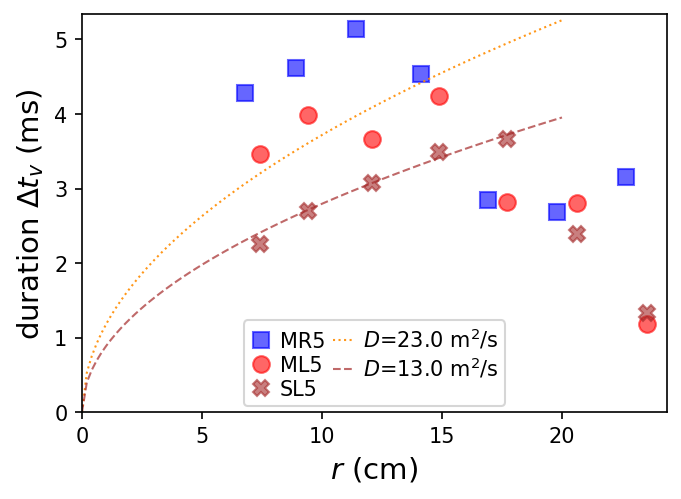

In [128]:

def dtfun(D,Deltat0,v_p,r):
    return np.sqrt(D*r/v_p**3 + Deltat0**2)

fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2,left=0.2,right=0.98)
ms_SL5.v_fwhm[-1] = -0.0001  # get rid of this point

k=0;  ax.plot(ds_R5.rcoords*1e2 ,ms_R5.v_fwhm*1e3,'s' ,label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; 
#ax.plot(ds_R10.rcoords*1e2,ms_R10.v_fwhm*1e3,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; 
#ax.plot(ds_R15.rcoords*1e2,ms_R15.v_fwhm*1e3,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L5.rcoords*1e2 ,ms_L5.v_fwhm*1e3,'o' ,label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_L10.rcoords*1e2,ms_L10.v_fwhm*1e3,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_L15.rcoords*1e2,ms_L15.v_fwhm*1e3,'o',label=mlabellist[k],ms=6,alpha=0.6,color=colorlist[k])
#k+=1; ax.plot(ds_SL5.rcoords*1e2,ms_SL5.v_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k=6; ax.plot(ds_SL5_2.rcoords*1e2,ms_SL5_2.v_fwhm*1e3,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.set_ylabel(r'duration $\Delta t_v$ (ms)',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)

xvec = np.linspace(0,20,100)
xvec_m = xvec /1e2 #-R_crater # in m
Deltat0 = 0.0e-3
d_g = 3.0 # mm
#D_millet = d_g/1e3*v_p*C_W**2
D_millet=23
C_W = np.sqrt(D_millet / (d_g/1e3 *v_p))
yvec1 = dtfun(D_millet,Deltat0,v_p,xvec_m)*1e3
#slabel1 = r'$C_W$={:.0f} $d_g={:.0f}$'.format(C_W,d_g)
#slabel1 = r'$D$={:.1f} m$^2$/s $\Delta t_0$ = {:.1f} ms'.format(D_millet,Deltat0*1e3) 
slabel1 = r'$D$={:.1f} m$^2$/s'.format(D_millet) 


sd_g = 0.3 # mm
#D_sand = sd_g/1e3*v_p*C_W**2
xvec_m2 = xvec/1e2  #- SR_crater # in m
Deltat0_2 = 0.e-3
D_sand=13.
SC_W = np.sqrt( D_sand / (sd_g/1e3 *v_p))
yvec2 = dtfun(D_sand,Deltat0_2,v_p,xvec_m2)*1e3
#slabel2 = r'$C_W$={:.0f} $d_g={:.1f}$'.format(C_W,sd_g)
#slabel2 = r'$D$={:.1f} m$^2$/s $\Delta t_0$ = {:.1f} ms'.format(D_sand,Deltat0_2*1e3) 
slabel2 = r'$D$={:.1f} m$^2$/s'.format(D_sand) 


ax.plot(xvec,yvec1,':',color='darkorange',label=slabel1,lw=1,alpha=0.9)
ax.plot(xvec,yvec2,'--',color='brown',label=slabel2,lw=1,alpha=0.7)

yvec1 = xvec**gamma_dtv /4
yvec2 = xvec**gamma_dtv2 /0.7
#ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
#ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.4,loc='lower center')
#ax.text(-3.3,5.0,'b)',fontsize=16)
plt.savefig(oroot+'fwhm_v_new.png')  #not used

print(' C_W {:.2f} SC_W {:.2f}'.format(C_W, SC_W))

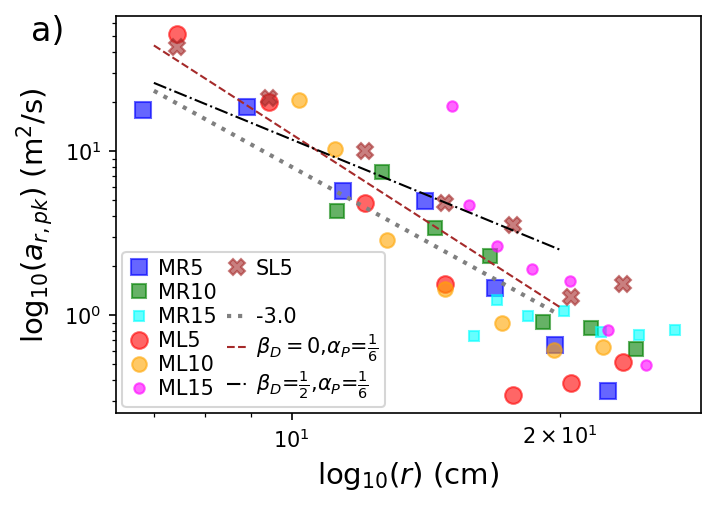

In [132]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)
#colorlist = ['blue','green','cyan','red','orange']
a_R5  = ms_R5.a_pk
a_R10 = ms_R10.a_pk
a_R15 = ms_R15.a_pk
a_L5  = ms_L5.a_pk
a_L10 = ms_L10.a_pk
a_L15 = ms_L15.a_pk
a_SL5  = ms_SL5.a_pk
a_SL5_2  = ms_SL5_2.a_pk

xvec = np.linspace(7,20,100)
alpha1=-3.0; yvec1 = xvec**alpha1 *8000
alabel1 = '{:.1f}'.format(alpha1)
#alpha2=-4.0;  yvec2 = (xvec/5)**alpha2 *20
#alabel2 = '{:.1f}'.format(alpha2)

k=0;  ax.plot(ds_R5.rcoords*1e2 ,a_R5 ,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,a_R10,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,a_R15,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot(ds_L5.rcoords*1e2 ,a_L5 ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,a_L10,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,a_L15,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,a_SL5 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,a_SL5_2 ,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

ax.plot([0],[0],'.',color='white',label=' ')
ax.plot(xvec,yvec1,':',color='grey',label=alabel1,lw=2)
#ax.plot(xvec,yvec2,':',color='brown',label=alabel2,lw=1)

yvec1 = xvec**gamma_apk *40000
yvec2 = xvec**gamma_apk2 *2000
ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)

ax.set_ylabel(r'log$_{10}(a_{r,pk})$ (m$^2$/s)',fontsize=14)
ax.set_xlabel(r'log$_{10}(r)$ (cm)',fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5)
ax.text(5.1,47,'a)',fontsize=16)
plt.savefig(oroot+'apk.png')

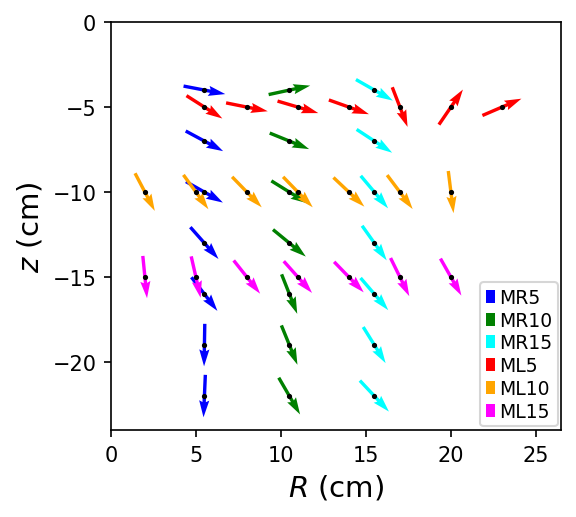

In [243]:
fig,ax = plt.subplots(1,1,figsize=(3.7,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.18, left=0.17,right=0.99)

ax.set_xlim([0,26.5])
ax.set_ylim([-24,0])
ax.set_aspect('equal')
k=0; ax.quiver(ds_R5.Rcoords*1e2,ds_R5.zcoords*1e2, np.cos(ms_R5.a_theta), np.sin(ms_R5.a_theta),label=mlabellist[k],\
          scale=0.4,scale_units='xy',pivot='mid',color=colorlist[0])
k+=1; ax.quiver(ds_R10.Rcoords*1e2,ds_R10.zcoords*1e2, np.cos(ms_R10.a_theta), np.sin(ms_R10.a_theta),label=mlabellist[k],\
         scale=0.4,scale_units='xy',pivot='mid',color=colorlist[k])
k+=1; ax.quiver(ds_R15.Rcoords*1e2,ds_R15.zcoords*1e2, np.cos(ms_R15.a_theta), np.sin(ms_R15.a_theta),label=mlabellist[k],\
         scale=0.4,scale_units='xy',pivot='mid',color=colorlist[k])
k+=1; ax.quiver(ds_L5.Rcoords*1e2,ds_L5.zcoords*1e2, np.cos(ms_L5.a_theta), np.sin(ms_L5.a_theta),label=mlabellist[k],\
         scale=0.4,scale_units='xy',pivot='mid',color=colorlist[k])
k+=1; ax.quiver(ds_L10.Rcoords*1e2,ds_L10.zcoords*1e2, np.cos(ms_L10.a_theta), np.sin(ms_L10.a_theta),label=mlabellist[k],\
         scale=0.4,scale_units='xy',pivot='mid',color=colorlist[k])
k+=1; ax.quiver(ds_L15.Rcoords*1e2,ds_L15.zcoords*1e2, np.cos(ms_L15.a_theta), np.sin(ms_L15.a_theta),label=mlabellist[k],\
         scale=0.4,scale_units='xy',pivot='mid',color=colorlist[k])

ax.plot(x,y,'k.',ms=3)
ax.set_ylabel(r'$z$ (cm)',fontsize=14)
ax.set_xlabel(r'$R$ (cm)',fontsize=14)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=0.5,handletextpad=0.2,borderaxespad=0.2,\
           ncol=1,columnspacing=0.3,loc='lower right',markerscale=0.3,fontsize=9)
plt.savefig(oroot+'theta_v.png')

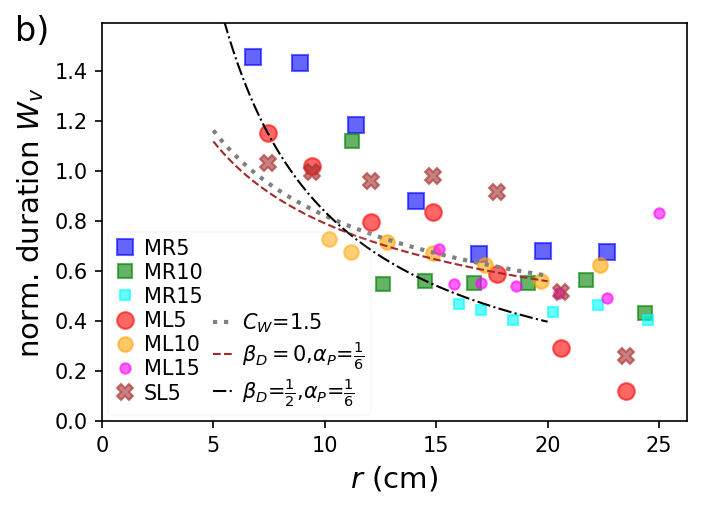

In [533]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98,bottom=0.2,left=0.2,right=0.98)

W_R5_v  = ms_R5.v_fwhm /ms_R5.v_tprop
W_R10_v = ms_R10.v_fwhm/ms_R10.v_tprop
W_R15_v = ms_R15.v_fwhm/ms_R15.v_tprop
W_L5_v  = ms_L5.v_fwhm /ms_L5.v_tprop
W_L10_v = ms_L10.v_fwhm/ms_L10.v_tprop
W_L15_v = ms_L15.v_fwhm/ms_L15.v_tprop
W_SL5_v = ms_SL5.v_fwhm/ms_SL5.v_tprop
W_SL5_2v = ms_SL5_2.v_fwhm/ms_SL5_2.v_tprop

k=0;  ax.plot( ds_R5.rcoords[:7]*1e2, W_R5_v[:7],'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords[:7]*1e2,W_R10_v[:7],'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords[:6]*1e2,W_R15_v[:6],'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot( ds_L5.rcoords[:7]*1e2, W_L5_v[:7],'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords[:7]*1e2,W_L10_v[:7],'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords[:7]*1e2,W_L15_v[:7],'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords[:7]*1e2,W_SL5_v[:7],'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords[:7]*1e2,W_SL5_2v[:7],'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])

xvec = np.linspace(5,20,100)
C_W = 1.5; 
D = 0.03*v_p*C_W**2
yvec = np.sqrt(D)/np.sqrt(xvec/100)/np.sqrt(v_p)
slabel = r'$C_W$={:.1f}'.format(C_W)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec,':',color='grey',label=slabel,lw=2)

yvec1 = xvec**gamma_Wv *2.5
yvec2 = xvec**gamma_Wv2 * 10
ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)

ax.set_ylabel(r'norm. duration $W_{v}$',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0,top=1.59)
ax.set_xlim(left=0)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower left',framealpha=0.1)
ax.text(-3.9,1.52,'b)',fontsize=16)

plt.savefig(oroot+'W_v.png')


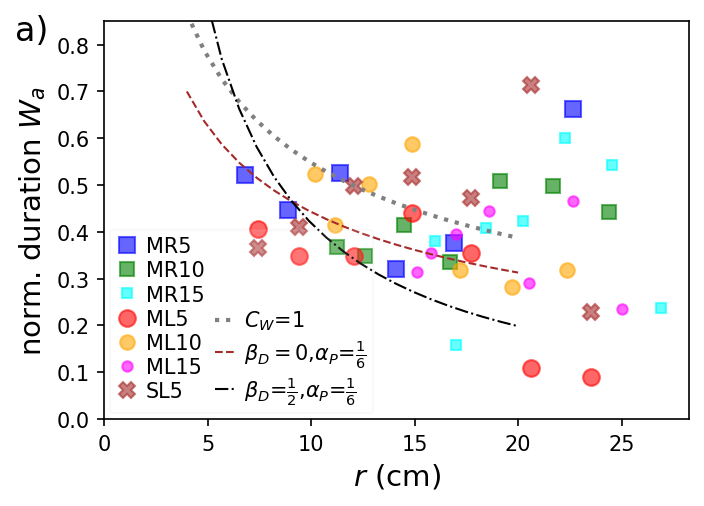

In [514]:
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2,left=0.2,right=0.98)

W_R5_a  = ms_R5.a_fwhm /ms_R5.a_tprop
W_R10_a = ms_R10.a_fwhm/ms_R10.a_tprop
W_R15_a = ms_R15.a_fwhm/ms_R15.a_tprop
W_L5_a  = ms_L5.a_fwhm /ms_L5.a_tprop
W_L10_a = ms_L10.a_fwhm/ms_L10.a_tprop
W_L15_a = ms_L15.a_fwhm/ms_L15.a_tprop
W_SL5_a = ms_SL5.a_fwhm/ms_SL5.a_tprop
W_SL5_2a = ms_SL5_2.a_fwhm/ms_SL5_2.a_tprop
k=0;  ax.plot( ds_R5.rcoords*1e2, W_R5_a,'s',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R10.rcoords*1e2,W_R10_a,'s',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_R15.rcoords*1e2,W_R15_a,'s',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

k+=1; ax.plot( ds_L5.rcoords*1e2,W_L5_a ,'o',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L10.rcoords*1e2,W_L10_a,'o',label=mlabellist[k],ms=7,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_L15.rcoords*1e2,W_L15_a,'o',label=mlabellist[k],ms=5,alpha=0.6,color=colorlist[k])

#k+=1; ax.plot(ds_SL5.rcoords*1e2,W_SL5_a,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])
k+=1; ax.plot(ds_SL5_2.rcoords*1e2,W_SL5_2a,'X',label=mlabellist[k],ms=8,alpha=0.6,color=colorlist[k])


xvec = np.linspace(4,20,20)
C_W = 1; 
D = 0.03*v_p*C_W**2
yvec = np.sqrt(D)/np.sqrt(xvec/100)/np.sqrt(v_p)
slabel = r'$C_W$={:.0f}'.format(C_W)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)
ax.plot(xvec,yvec,':',color='grey',label=slabel,lw=2)

#ax.plot([0],[-1],'.',color='white',label=' ',alpha=0.1)

yvec1 = xvec**gamma_Wv *1.4
yvec2 = xvec**gamma_Wv2 *5
ax.plot(xvec,yvec1,'--',label=g_lab1,color='brown',lw=1)
ax.plot(xvec,yvec2,'-.',label=g_lab2,color='black',lw=1)

ax.set_ylabel(r'norm. duration $W_{a}$',fontsize=14)
ax.set_xlabel(r'$r$ (cm)',fontsize=14)
ax.set_ylim(bottom=0,top=0.85)
ax.set_xlim(left=0)

plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower left',framealpha=0.1)
ax.text(-4.3,0.81,'a)',fontsize=16)

plt.savefig(oroot+'W_a.png')